<a href="https://colab.research.google.com/github/RozenkovAndrey/projects_of_yandex_practicum/blob/main/advertising_marketing/advertising_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Маркетинговое исследование окупаемости рекламы

**Цель данного проекта** - найти окупаемыме трафики рекламы и дать рекомендации для увеличению прибыли за счёт улучшения выбора параметров настройки рекламы 

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

#### Шаг 1 Предобработка данных

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from datetime import datetime, timedelta
plt.style.use('classic')
import warnings
warnings.filterwarnings("ignore")

In [71]:
visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
purchases = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

In [72]:
visits.head()

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

In [73]:
purchases.head()

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

In [74]:
costs.head()

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

In [75]:
# Пишу функцию с общими сведениями о датафреймах
def info_df(df):
  display(df.info()) # информация о типах данных и их количестве
  print()
  display("Количество пропусков:", df.isna().sum()) # пропуски
  print()
  display("Число строк и столбцов:", df.shape) # число строк и столбцов
  print()
  display("Количество дупликатов:", df.duplicated().sum()) # проверка на наличие дубликатов

In [76]:
# Вывожу общие сведения о датафреймах
list_of_df = [visits, purchases, costs]
for i,j in enumerate(list_of_df, 1):
  print(f"Информация о датасете {i}")
  print()
  info_df(j)
  print()
  print()
  print()

Информация о датасете 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

'Количество пропусков:'

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

'Число строк и столбцов:'

(309901, 6)

'Количество дупликатов:'

0




Информация о датасете 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

'Количество пропусков:'

User Id     0
Event Dt    0
Revenue     0
dtype: int64

'Число строк и столбцов:'

(40212, 3)

'Количество дупликатов:'

0




Информация о датасете 3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

'Количество пропусков:'

dt         0
Channel    0
costs      0
dtype: int64

'Число строк и столбцов:'

(1800, 3)

'Количество дупликатов:'

0

В датасетах не верно определён тип данных с датами, названия столбцов в верхнем регистре

In [77]:
# Преобразую в нижний регистр названия столбцов

visits.columns=['user_id','region','device','channel', 'session_start','session_end']   
purchases.columns=['user_id','event_dt','revenue']
costs.columns=['dt','channel','costs']

In [78]:
# Исправляю тип данных с датами на datetime64

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
purchases['event_dt'] = pd.to_datetime(purchases['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

<Axes: >

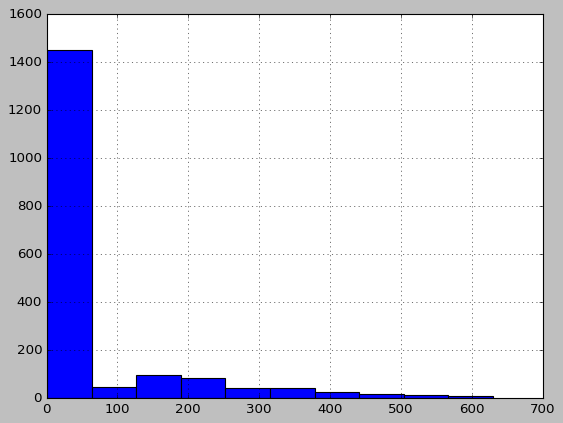

In [79]:
# Распределение стоимости привлечения клиентов по датам
costs.costs.hist()

<Axes: >

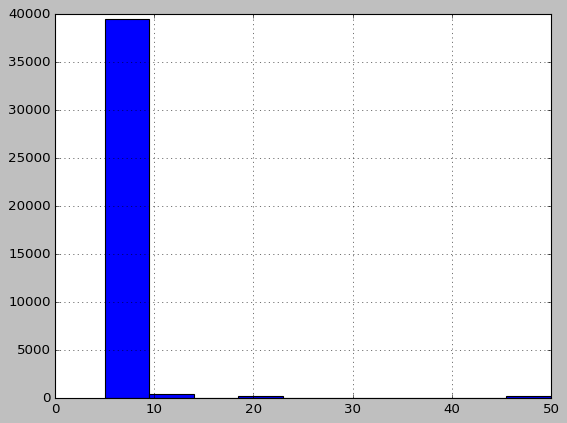

In [80]:
# Распределение сумм покупок клиентов
purchases.revenue.hist()

### Шаг 2 Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [81]:
# Определяю минимальную и максимальную дату/время сессий
print(visits.session_start.min())
print(visits.session_start.max())

2019-05-01 00:00:41
2019-10-31 23:59:23


Определите минимальную и максимальную даты привлечения пользователей.

In [82]:
#conversion_history.query('dt>datetime(2019, 10, 6).date()')

####**Функции для профиля, удержания и визуализации удержания**

In [83]:
# Беру функцию из теории и применяю её на датасет visits и получаю датасет
# profiles с первыми device, channel, датой и временем начала сессии и регион пользователей  
def get_profiles(sessions):

    # сортируем сессии по ID пользователя и дате посещения
    # группируем по ID и находим первые значения session_start и channel
    # столбец с временем первого посещения назовём first_ts
    # от англ. first timestamp — первая временная отметка
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg({'device': 'first', 'region': 'first','session_start': 'first', 'channel': 'first'})
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    # эти данные понадобятся для когортного анализа
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    return profiles
  
profiles = get_profiles(visits)
profiles  

user_id  device         region            first_ts       channel  \
0             599326     Mac  United States 2019-05-07 20:58:57      FaceBoom   
1            4919697  iPhone  United States 2019-07-09 12:46:07      FaceBoom   
2            6085896  iPhone         France 2019-10-01 09:58:33       organic   
3           22593348      PC        Germany 2019-08-22 21:35:48    AdNonSense   
4           31989216  iPhone  United States 2019-10-02 00:07:44       YRabbit   
...              ...     ...            ...                 ...           ...   
150003  999956196527  iPhone  United States 2019-09-28 08:33:02        TipTop   
150004  999975439887      PC             UK 2019-10-21 00:35:17       organic   
150005  999976332130  iPhone  United States 2019-07-23 02:57:06        TipTop   
150006  999979924135      PC  United States 2019-09-28 21:28:09  MediaTornado   
150007  999999563947  iPhone  United States 2019-10-18 19:57:25       organic   

                dt               month  
0       2019-05-07 2019-05-07 20:58:57  
1       2019-07-09 2019-07-09 12:46:07  
2       2019-10-01 2019-10-01 09:58:33  
3       2019-08-22 2019-08-22 21:35:48  
4       2019-10-02 2019-10-02 00:07:44  
...            ...                 ...  
150003  2019-09-28 2019-09-28 08:33:02  
150004  2019-10-21 2019-10-21 00:35:17  
150005  2019-07-23 2019-07-23 02:57:06  
150006  2019-09-28 2019-09-28 21:28:09  
150007  2019-10-18 2019-10-18 19:57:25  

[150008 rows x 7 columns]

In [84]:
# Смотрю распределение польователей по каналам привлечения
profiles.groupby('channel').agg({'user_id': 'nunique'})

user_id
channel                    
AdNonSense             3880
FaceBoom              29144
LeapBob                8553
MediaTornado           4364
OppleCreativeMedia     8605
RocketSuperAds         4448
TipTop                19561
WahooNetBanner         8553
YRabbit                4312
lambdaMediaAds         2149
organic               56439

In [85]:
# Смотрю распределение польователей по регионам
profiles.groupby('region').agg({'user_id': 'nunique'})

user_id
region                
France           17450
Germany          14981
UK               17575
United States   100002

In [86]:
# Смотрю распределение польователей по устройствам
profiles.groupby('device').agg({'user_id': 'nunique'})

user_id
device          
Android    35032
Mac        30042
PC         30455
iPhone     54479

In [87]:
# Строю график количества уникальных пользователей по регионам, устройствам, каналам привлечения
import plotly.express as px
from plotly.subplots import make_subplots
for j in ['channel', 'device', 'region']:
  profiles1 = profiles.pivot_table(
      index='dt',  # даты первых посещений
      columns= j,  # источники переходов
      values='user_id',  # ID пользователей
      aggfunc='nunique'  # подсчёт уникальных значений
  )
  
  fig = px.line(profiles1, title = f"Количество уникальных пользователей по {j}")
  
  fig.show()

In [88]:
#Задаю функцию для определения удержания пользователей
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [89]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

####**Функции для конверсии и визуализации конверсии**

In [90]:
#Вывожу функцию для подсчёта конверсии
def get_conversion2(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [91]:
#Вывожу функцию динамики конверсии и конверсии с лайфтаймом 14 дней за весь доступны период с применением сглаживания 
def plot_conversion(conversion, conversion_history, horizon, window=10):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    a = filter_data(filtered_data, window)
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей за весь доступный период')

    plt.tight_layout()
    plt.show()

####**Функции для расчёта LTV, ROI и CAC**

In [92]:
# Вывожу функцию для расчёта LTV
def get_ltv(
    profiles,  # Шаг 1. Получить профили и данные о покупках
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Добавить данные о покупках в профили

    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и выручку
        purchases[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    # Шаг 3. Рассчитать лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 4. Построить таблицу выручки
        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        # Шаг 5. Посчитать сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # Шаг 6. Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Шаг 7. Объединить размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 8. Посчитать LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу LTV
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики LTV убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []
    # получаем таблицу динамики LTV
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы LTV и сырые данные
    return result_raw, result_grouped, result_in_time

In [93]:
# Вызываю функцию для расчёта CAC
def get_profiles2(visits, purchases, costs):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(purchases['user_id'].unique())

        # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
    
    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']    
    
    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

In [94]:
# Вывожу таблицу с добавлеными столбцами payer,	acquisition_cost
profiles = get_profiles2(visits, purchases, costs)
profiles

user_id            first_ts       channel  device         region  \
0             599326 2019-05-07 20:58:57      FaceBoom     Mac  United States   
1            4919697 2019-07-09 12:46:07      FaceBoom  iPhone  United States   
2            6085896 2019-10-01 09:58:33       organic  iPhone         France   
3           22593348 2019-08-22 21:35:48    AdNonSense      PC        Germany   
4           31989216 2019-10-02 00:07:44       YRabbit  iPhone  United States   
...              ...                 ...           ...     ...            ...   
150003  999956196527 2019-09-28 08:33:02        TipTop  iPhone  United States   
150004  999975439887 2019-10-21 00:35:17       organic      PC             UK   
150005  999976332130 2019-07-23 02:57:06        TipTop  iPhone  United States   
150006  999979924135 2019-09-28 21:28:09  MediaTornado      PC  United States   
150007  999999563947 2019-10-18 19:57:25       organic  iPhone  United States   

                dt               month  payer  acquisition_cost  
0       2019-05-07 2019-05-07 20:58:57   True          1.088172  
1       2019-07-09 2019-07-09 12:46:07  False          1.107237  
2       2019-10-01 2019-10-01 09:58:33  False          0.000000  
3       2019-08-22 2019-08-22 21:35:48  False          0.988235  
4       2019-10-02 2019-10-02 00:07:44  False          0.230769  
...            ...                 ...    ...               ...  
150003  2019-09-28 2019-09-28 08:33:02  False          3.500000  
150004  2019-10-21 2019-10-21 00:35:17  False          0.000000  
150005  2019-07-23 2019-07-23 02:57:06  False          2.600000  
150006  2019-09-28 2019-09-28 21:28:09  False          0.205714  
150007  2019-10-18 2019-10-18 19:57:25  False          0.000000  

[150008 rows x 9 columns]

In [95]:
# Вывожу функцию для расчёта ROI
def get_ltv2(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

####**Функция для сглаживания**

In [96]:
# Вывожу функцию для сглаживания скользящего среднего
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### Шаг 3 Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [97]:
# интервал привлечения пользователей

min_date=profiles.first_ts.min()

observation_date=profiles.first_ts.max() #момент анализа 

print(f'Минимальная дата привлечения пользователей{min_date}\nМаксимальная дата привлечения пользователей {observation_date}')

Минимальная дата привлечения пользователей2019-05-01 00:00:41
Максимальная дата привлечения пользователей 2019-10-27 23:59:04


**Вывод:** Интервал привлечения пользователей - 1 мая по 27 октября 2019 года (совпадает с минимальной и максимальной датой привлечения пользователей)

In [98]:
#Считаю количество пользователей и доля платящих из каждой страны

profiles['payer'] =profiles['user_id'].isin(purchases['user_id'].unique()) #проверка платящих пользователей

profiles_region= (profiles.groupby('region')
                  .agg(
                      {'user_id':'nunique','payer':'mean'})
                  .sort_values(by='payer',ascending=False)
                  .reset_index()
                 )
profiles_region

region  user_id     payer
0  United States   100002  0.069019
1        Germany    14981  0.041119
2             UK    17575  0.039829
3         France    17450  0.037994

In [99]:
#Считаю отношение платящих пользователей в США и Франции
0.069019/0.037994

1.8165763015212928

**Вывод:** Больше всего платящих пользователей приходятся на США, а меньше всего на Францию. Покупки в США примерно в 1,8 раз превышают покупки во Франции. А покупки во Франции, Германии и Англии примерно равны.


In [100]:
# Количество пользователей и доля платящих в разбивке по устройствам

profiles['payer'] =profiles['user_id'].isin(purchases['user_id'].unique()) #проверка платящих пользователей

profiles_region= (profiles.groupby('device')
                  .agg(
                      {'user_id':'nunique','payer':'mean'})
                  .sort_values(by='payer',ascending=False)
                  .reset_index()
                 )
profiles_region

device  user_id     payer
0      Mac    30042  0.063644
1   iPhone    54479  0.062079
2  Android    35032  0.058518
3       PC    30455  0.050468

**Вывод:** В разивке по устройствам доля платящих пользователей больше у Mac и iPhone. Меньшее количество у Android и PC.

In [101]:
# Считаю долю платящих пользователей по каналам привлечения
profiles_channel=(profiles.groupby('channel')
                 .agg({'user_id': 'nunique','payer':'mean'})
                 .sort_values(by='payer',ascending=False)
                 .reset_index()
                )
profiles_channel

channel  user_id     payer
0             FaceBoom    29144  0.122049
1           AdNonSense     3880  0.113402
2       lambdaMediaAds     2149  0.104700
3               TipTop    19561  0.096007
4       RocketSuperAds     4448  0.079137
5       WahooNetBanner     8553  0.052964
6              YRabbit     4312  0.038265
7         MediaTornado     4364  0.035747
8              LeapBob     8553  0.030633
9   OppleCreativeMedia     8605  0.027077
10             organic    56439  0.020553

**Вывод:** В разивке по каналам привлечения клиентов лидируют FaceBoom, AdNonSense, lambdaMediaAds, а меньше всего у organic.

### Шаг 4 Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [102]:
print('Общая сумма распределения на маркетинг:',profiles.acquisition_cost.sum())

Общая сумма распределения на маркетинг: 105497.29999999999


In [103]:
# Считаю распределение пользователей по каналам привлечения
profiles_channel=(profiles
                  .groupby('channel')         
                  .agg({'user_id': 'nunique', 'dt': 'first'})
                  .sort_values(by='user_id',ascending=False)
                  .reset_index())
profiles_channel

channel  user_id          dt
0              organic    56439  2019-10-01
1             FaceBoom    29144  2019-05-07
2               TipTop    19561  2019-08-04
3   OppleCreativeMedia     8605  2019-09-17
4              LeapBob     8553  2019-07-24
5       WahooNetBanner     8553  2019-07-20
6       RocketSuperAds     4448  2019-10-09
7         MediaTornado     4364  2019-05-11
8              YRabbit     4312  2019-10-02
9           AdNonSense     3880  2019-08-22
10      lambdaMediaAds     2149  2019-09-05

In [104]:
#Считаю среднюю стоимость на привлечение одного клиента по каналам привлечения
profiles_cost_channel = profiles.groupby('channel')[['acquisition_cost']].mean()
profiles_cost_channel

acquisition_cost
channel                             
AdNonSense                  1.008054
FaceBoom                    1.113286
LeapBob                     0.210172
MediaTornado                0.218717
OppleCreativeMedia          0.250000
RocketSuperAds              0.412095
TipTop                      2.799003
WahooNetBanner              0.602245
YRabbit                     0.218975
lambdaMediaAds              0.724802
organic                     0.000000

In [105]:
channel_user_acquisition_cost = profiles_channel.merge(profiles_cost_channel, on = 'channel', how = 'left')


In [106]:
channel_user_acquisition_cost['sum_price'] = channel_user_acquisition_cost.user_id*channel_user_acquisition_cost.acquisition_cost
channel_user_acquisition_cost.sort_values(by = 'sum_price', ascending = False)

channel  user_id          dt  acquisition_cost  sum_price
2               TipTop    19561  2019-08-04          2.799003   54751.30
1             FaceBoom    29144  2019-05-07          1.113286   32445.60
5       WahooNetBanner     8553  2019-07-20          0.602245    5151.00
9           AdNonSense     3880  2019-08-22          1.008054    3911.25
3   OppleCreativeMedia     8605  2019-09-17          0.250000    2151.25
6       RocketSuperAds     4448  2019-10-09          0.412095    1833.00
4              LeapBob     8553  2019-07-24          0.210172    1797.60
10      lambdaMediaAds     2149  2019-09-05          0.724802    1557.60
7         MediaTornado     4364  2019-05-11          0.218717     954.48
8              YRabbit     4312  2019-10-02          0.218975     944.22
0              organic    56439  2019-10-01          0.000000       0.00

In [107]:
#Проверяю, что общая сумма на привлечения по каналам равна общей сумме на привлечение клиентов
channel_user_acquisition_cost['sum_price'].sum()

105497.30000000002

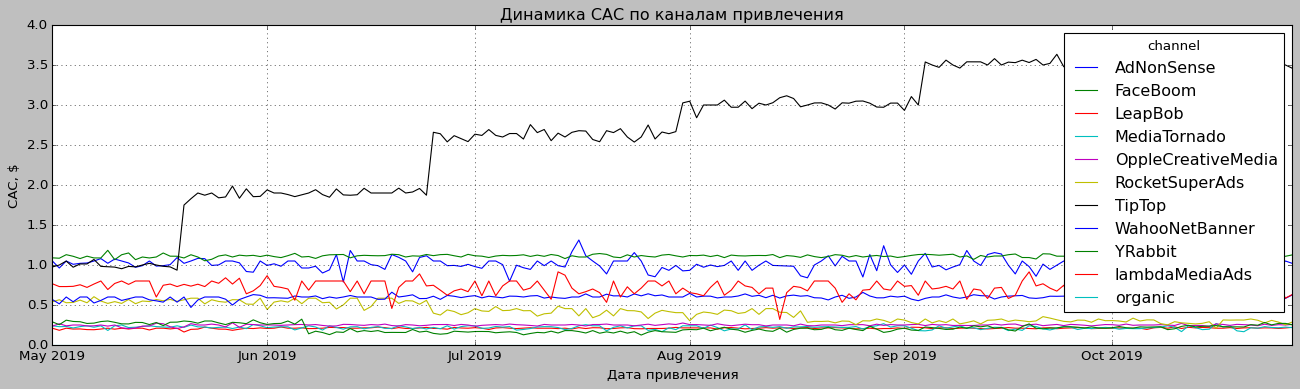

In [108]:
# строим график истории изменений CAC по каналам привлечения по месяцам

profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(20, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

In [109]:
profiles["dt"] = pd.to_datetime(profiles["dt"], format='%Y-%m-%d')
profiles['week'] = profiles["dt"].dt.week
profiles

user_id            first_ts       channel  device         region  \
0             599326 2019-05-07 20:58:57      FaceBoom     Mac  United States   
1            4919697 2019-07-09 12:46:07      FaceBoom  iPhone  United States   
2            6085896 2019-10-01 09:58:33       organic  iPhone         France   
3           22593348 2019-08-22 21:35:48    AdNonSense      PC        Germany   
4           31989216 2019-10-02 00:07:44       YRabbit  iPhone  United States   
...              ...                 ...           ...     ...            ...   
150003  999956196527 2019-09-28 08:33:02        TipTop  iPhone  United States   
150004  999975439887 2019-10-21 00:35:17       organic      PC             UK   
150005  999976332130 2019-07-23 02:57:06        TipTop  iPhone  United States   
150006  999979924135 2019-09-28 21:28:09  MediaTornado      PC  United States   
150007  999999563947 2019-10-18 19:57:25       organic  iPhone  United States   

               dt               month  payer  acquisition_cost  week  
0      2019-05-07 2019-05-07 20:58:57   True          1.088172    19  
1      2019-07-09 2019-07-09 12:46:07  False          1.107237    28  
2      2019-10-01 2019-10-01 09:58:33  False          0.000000    40  
3      2019-08-22 2019-08-22 21:35:48  False          0.988235    34  
4      2019-10-02 2019-10-02 00:07:44  False          0.230769    40  
...           ...                 ...    ...               ...   ...  
150003 2019-09-28 2019-09-28 08:33:02  False          3.500000    39  
150004 2019-10-21 2019-10-21 00:35:17  False          0.000000    43  
150005 2019-07-23 2019-07-23 02:57:06  False          2.600000    30  
150006 2019-09-28 2019-09-28 21:28:09  False          0.205714    39  
150007 2019-10-18 2019-10-18 19:57:25  False          0.000000    42  

[150008 rows x 10 columns]

**Строю динамику изменения расходов по месяцам и неделям**

In [ ]:
#Динамика расходов по каждом источнику по месяцам (график)
profiles_sales_month = profiles.groupby(['channel','month']).agg({'user_id':'count', 'acquisition_cost':'mean'})
profiles_sales_month['sum_sales'] = profiles_sales_month.user_id*profiles_sales_month.acquisition_cost 
profiles_sales_month = profiles_sales_month.pivot_table(index='month', columns='channel', values='sum_sales')
profiles_sales_month.plot(figsize = (15,15))
plt.legend(loc = 'upper left')
plt.title('Динамика расходов по месяцам по каждому источнику')

Text(0.5, 1.0, 'Динамика расходов по неделям по каждому источнику')

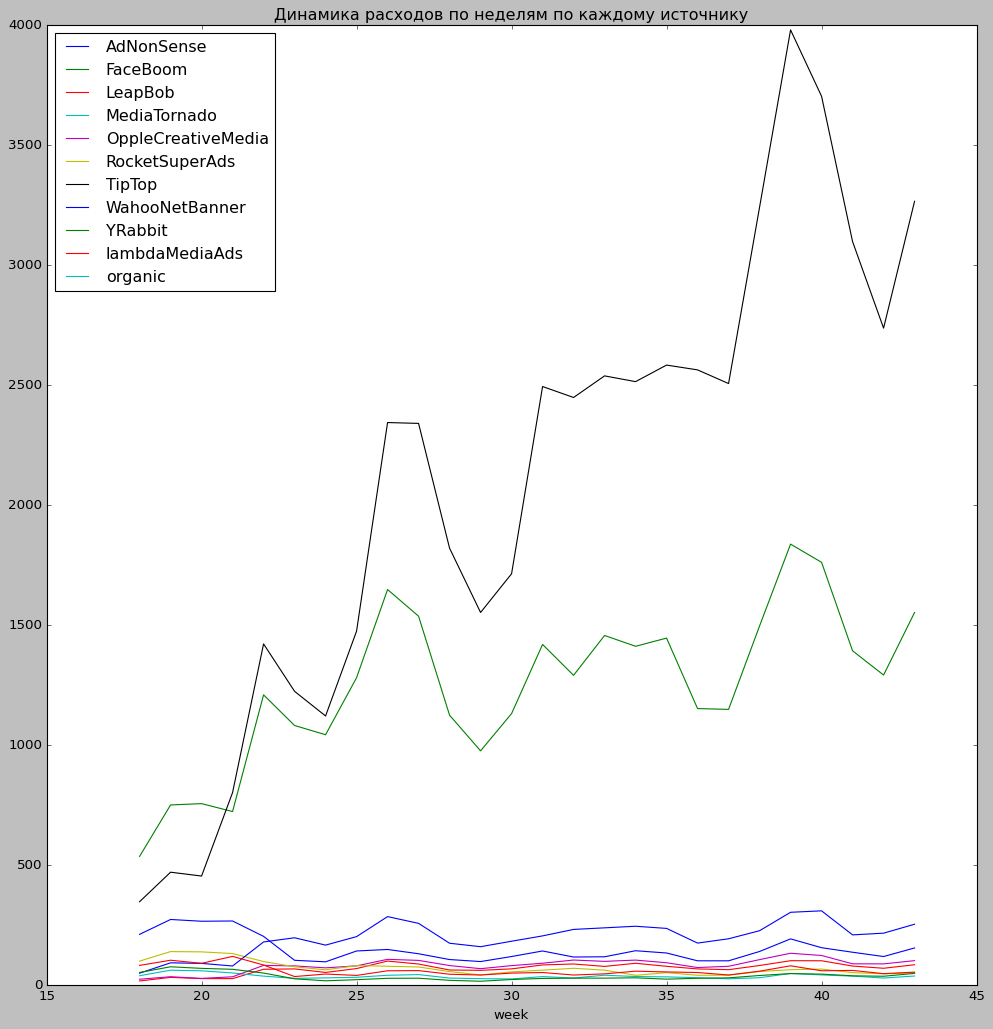

In [111]:
#Динамика расходов по каждом источнику по неделям (график)
profiles_sales_week = profiles.groupby(['channel','week']).agg({'user_id':'count', 'acquisition_cost':'mean'})
profiles_sales_week['sum_sales'] = profiles_sales_week.user_id*profiles_sales_week.acquisition_cost 
profiles_sales_week = profiles_sales_week.pivot_table(index='week', columns='channel', values='sum_sales')
profiles_sales_week.plot(figsize = (15,15))
plt.legend(loc = 'upper left')
plt.title('Динамика расходов по неделям по каждому источнику')

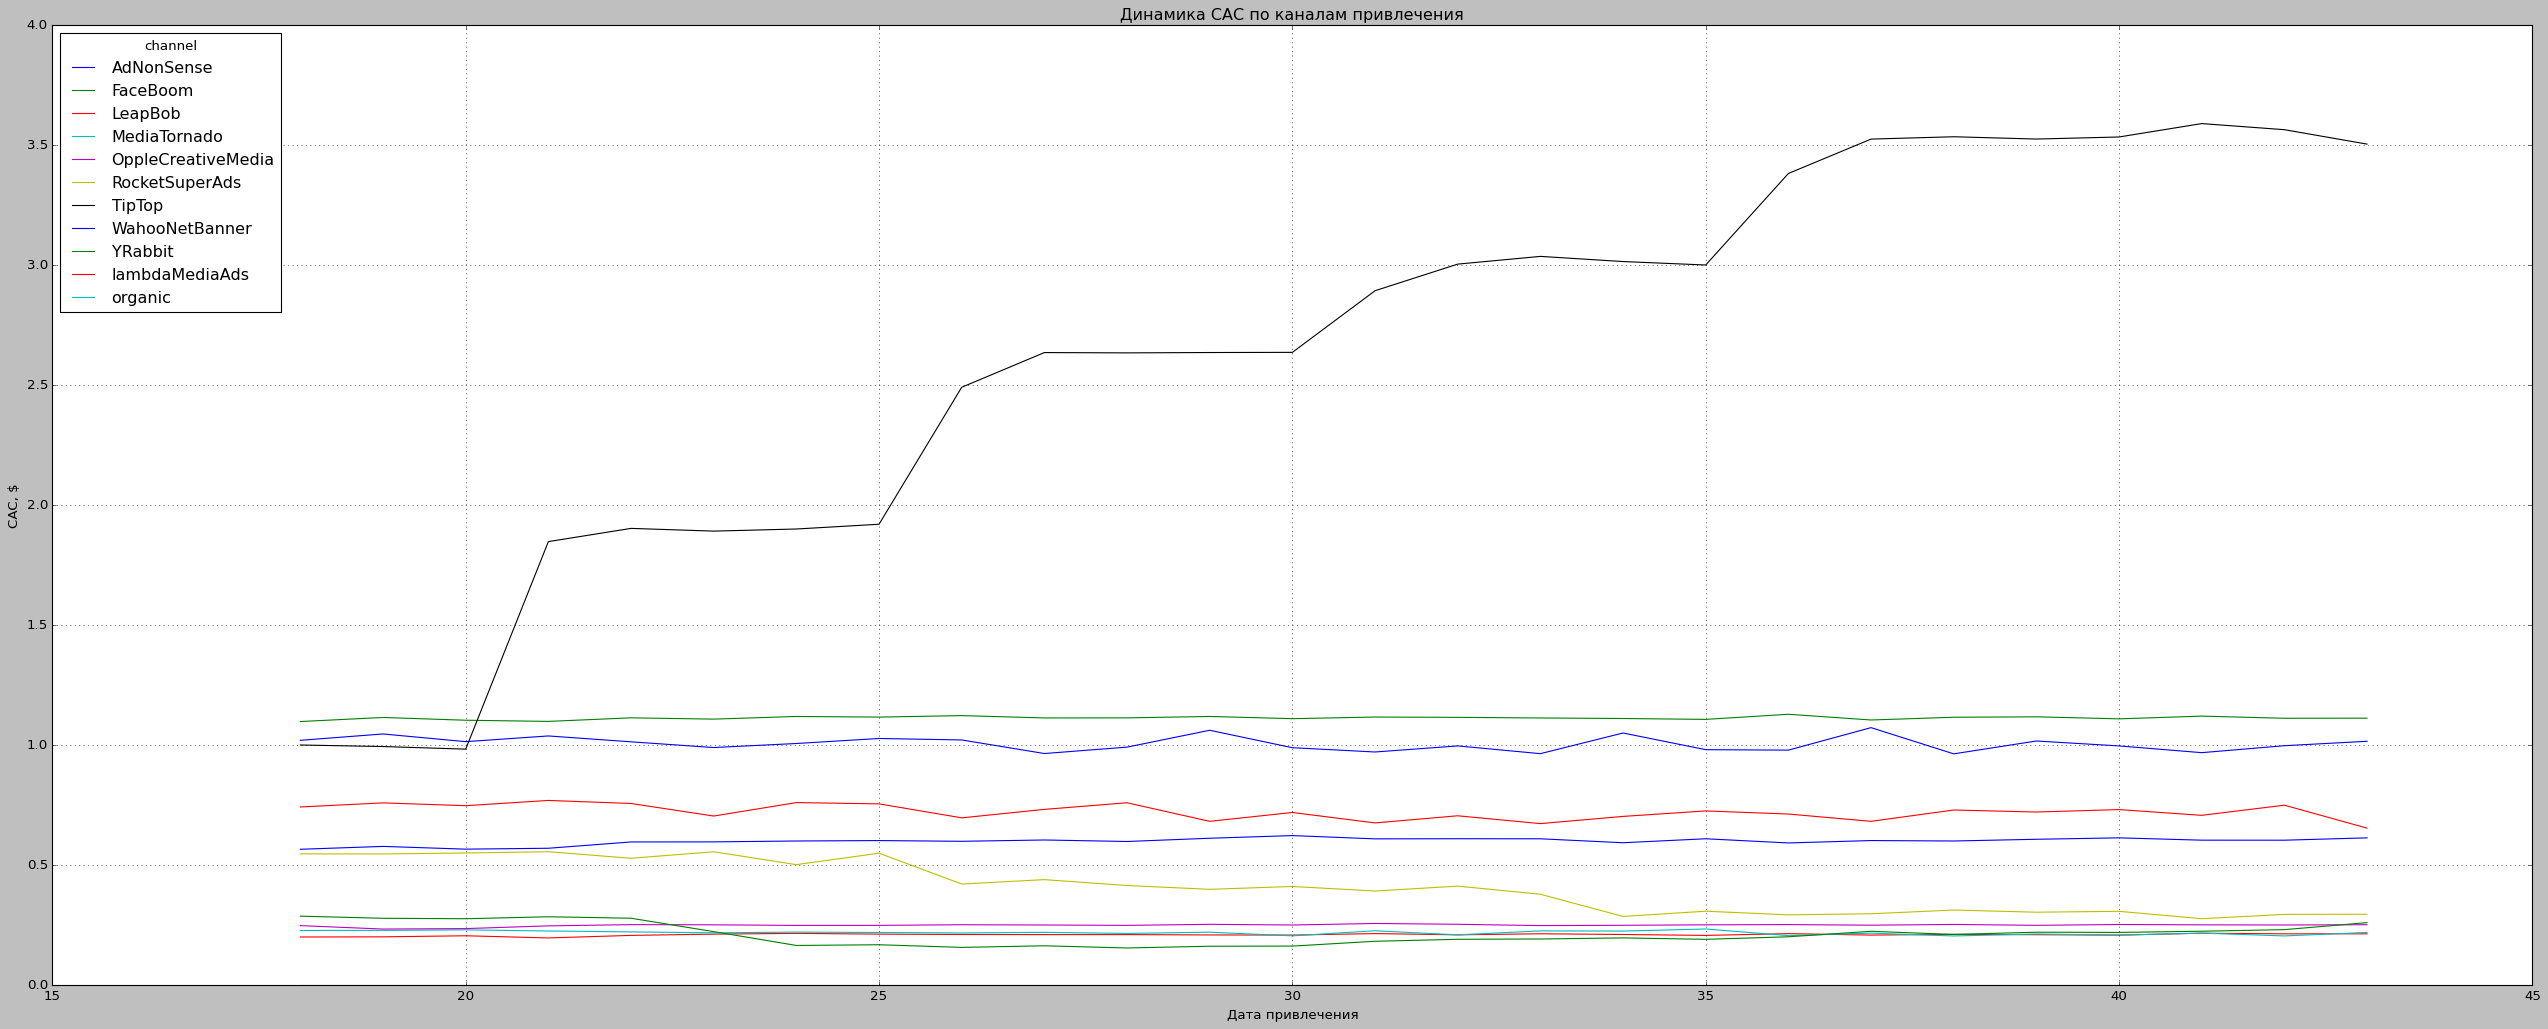

In [112]:
# строим график истории изменений CAC по каналам привлечения по неделям

profiles.pivot_table(
    index='week', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(40, 15))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

**Вывод:**
Почти все источники отличаются стабильностью: количество привлекаемых ими пользователей не опускается ниже определённого уровня.

Канал Faceboom в среднем по стоимости CAC 1.1$, и на него приходится большая доля пользователей - 29144. Так же благоприятные показатели по привлечению пользователей у каналов AdNonSense,lambdaMediaAds

По каналу привлечения TipTop, стоимость привлечения пользователей значительно возрасла более чем в три раза с мая по ноябрь, при этом не принеся за собой много пользователей бизнесу,всего 19561,что более чем в 1,5 раза ниже чем по каналу Faceboom.

### Шаг 5 Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [113]:
#Удаляю бесплатный канал привлечения органик для расчёта окупаемости платной рекламы
profiles = profiles.query('channel != "organic"')
profiles.channel.unique()

array(['FaceBoom', 'AdNonSense', 'YRabbit', 'MediaTornado',
       'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [114]:
# Задаю общую функцию для визуализации графиков LTV и ROI, а также графики динамики LTV, CAC и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(40, 30))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

####**Таблицы LTV с группировкой по регионам, устройствам и каналам привлечения и без группировки**

In [115]:
# Вызываю функцию для расчёта ltv 
ltv_raw, ltv_all, ltv_history_all = get_ltv(
    profiles, purchases, datetime(2019, 11, 1).date(), 14, dimensions = []
)
ltv_all

cohort_size      0.0       1.0       2.0      3.0       4.0  \
cohort                                                                   
All users        88644  0.34558  0.435754  0.504507  0.56109  0.611436   

                5.0      6.0       7.0       8.0       9.0      10.0     11.0  \
cohort                                                                          
All users  0.654368  0.69414  0.729778  0.764619  0.796665  0.826152  0.85207   

               12.0     13.0  
cohort                        
All users  0.878116  0.90203

In [116]:
# Вызываю функцию для расчёта ltv с разбивкой по каналам
ltv_raw, ltv_channel, ltv_history_channel = get_ltv(
    profiles, purchases, datetime(2019, 11, 1).date(), 14, dimensions = ['channel']
)
ltv_channel

cohort_size       0.0       1.0       2.0       3.0  \
channel                                                                   
AdNonSense                 3702  0.505030  0.589149  0.644417  0.683509   
FaceBoom                  27544  0.585703  0.660825  0.700722  0.728842   
LeapBob                    8103  0.107048  0.155702  0.205583  0.235391   
MediaTornado               4167  0.137485  0.191615  0.246943  0.293667   
OppleCreativeMedia         8139  0.097239  0.131578  0.171686  0.206636   
RocketSuperAds             4251  0.207570  0.318640  0.396114  0.455980   
TipTop                    18498  0.343550  0.497389  0.624141  0.739834   
WahooNetBanner             8082  0.191302  0.291477  0.378921  0.443754   
YRabbit                    4102  0.163301  0.213423  0.256000  0.303932   
lambdaMediaAds             2056  0.460268  0.645302  0.778789  0.905540   

                         4.0       5.0       6.0       7.0       8.0  \
channel                                                                
AdNonSense          0.706694  0.732582  0.754149  0.767628  0.789203   
FaceBoom            0.747143  0.760369  0.774718  0.784757  0.792404   
LeapBob             0.259654  0.288599  0.314587  0.333802  0.369543   
MediaTornado        0.332249  0.366979  0.388534  0.418474  0.440034   
OppleCreativeMedia  0.241103  0.266240  0.290152  0.309527  0.328544   
RocketSuperAds      0.515613  0.571019  0.639125  0.687255  0.737986   
TipTop              0.842358  0.935707  1.013676  1.096450  1.171400   
WahooNetBanner      0.516862  0.569469  0.631870  0.678176  0.725353   
YRabbit             0.356265  0.387894  0.414656  0.438988  0.460885   
lambdaMediaAds      1.041503  1.160433  1.262369  1.352169  1.444888   

                         9.0      10.0      11.0      12.0      13.0  
channel                                                               
AdNonSense          0.802682  0.806996  0.815084  0.827215  0.838006  
FaceBoom            0.800775  0.806247  0.812226  0.817483  0.821469  
LeapBob             0.394176  0.417579  0.437902  0.457608  0.473004  
MediaTornado        0.461589  0.485541  0.508294  0.526256  0.533684  
OppleCreativeMedia  0.346938  0.364228  0.376613  0.395017  0.409118  
RocketSuperAds      0.790118  0.831437  0.864307  0.898586  0.933801  
TipTop              1.245485  1.311417  1.371467  1.427640  1.487908  
WahooNetBanner      0.765488  0.812535  0.849334  0.889472  0.918615  
YRabbit             0.480349  0.502245  0.524147  0.546287  0.559668  
lambdaMediaAds      1.505564  1.579348  1.630316  1.695861  1.766250

In [117]:
# Вызываю функцию для расчёта ltv с разбивкой по устройствам
ltv_raw, ltv_region, ltv_history_region = get_ltv(
    profiles, purchases, datetime(2019, 11, 1).date(), 14, dimensions = ['region']
)
ltv_region

cohort_size       0.0       1.0       2.0       3.0       4.0  \
region                                                                         
France               10516  0.193428  0.259783  0.311696  0.360199  0.406892   
Germany               9030  0.186350  0.258858  0.327945  0.375473  0.422776   
UK                   10536  0.218683  0.296762  0.367626  0.416607  0.465505   
United States        58562  0.420285  0.519636  0.590981  0.651779  0.703511   

                    5.0       6.0       7.0       8.0       9.0      10.0  \
region                                                                      
France         0.450173  0.481019  0.507213  0.541484  0.570906  0.600042   
Germany        0.460907  0.496938  0.534074  0.571104  0.605367  0.641507   
UK             0.503964  0.556090  0.585644  0.623741  0.645527  0.668830   
United States  0.747926  0.787655  0.825852  0.859873  0.893893  0.923530   

                   11.0      12.0      13.0  
region                                       
France         0.621870  0.649871  0.670278  
Germany        0.665932  0.691355  0.713019  
UK             0.692322  0.719800  0.743481  
United States  0.950849  0.976382  1.001316

In [118]:
# Вызываю функцию для расчёта ltv с разбивкой по устройствам
ltv_raw, ltv_device, ltv_history_device = get_ltv(
    profiles, purchases, datetime(2019, 11, 1).date(), 14, dimensions = ['device']
)
ltv_device

cohort_size       0.0       1.0       2.0       3.0       4.0  \
device                                                                   
Android        20683  0.339218  0.430766  0.500209  0.555218  0.608159   
Mac            17747  0.382235  0.480219  0.550124  0.605077  0.651197   
PC             18128  0.277400  0.361536  0.430422  0.485652  0.539617   
iPhone         32086  0.367928  0.456307  0.523902  0.583165  0.632132   

              5.0       6.0       7.0       8.0       9.0      10.0      11.0  \
device                                                                          
Android  0.661395  0.699810  0.738562  0.773986  0.806850  0.833871  0.856068   
Mac      0.685782  0.721831  0.752874  0.790957  0.825376  0.857376  0.884370   
PC       0.581623  0.631240  0.661959  0.701004  0.729414  0.761510  0.788708   
iPhone   0.673563  0.710708  0.749656  0.779956  0.812214  0.840427  0.867426   

             12.0      13.0  
device                       
Android  0.887970  0.912098  
Mac      0.904617  0.930541  
PC       0.812106  0.836167  
iPhone   0.894400  0.916983

####**Таблицы ROI с группировкой по регионам, устройствам и каналам привлечения и без группировки**

In [119]:
# Расчитываю ROI по каналам привлечения за 14 дней за весь доступный период без группировки
result_raw,  result_all,  result_in_time,  roi_grouped_all, roi_in_time_all = get_ltv2(
    profiles,
    purchases,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=[],
    ignore_horizon=False,
)

result_all

cohort_size      0.0       1.0       2.0      3.0       4.0  \
cohort                                                                   
All users        88644  0.34558  0.435754  0.504507  0.56109  0.611436   

                5.0      6.0       7.0       8.0       9.0      10.0     11.0  \
cohort                                                                          
All users  0.654368  0.69414  0.729778  0.764619  0.796665  0.826152  0.85207   

               12.0     13.0  
cohort                        
All users  0.878116  0.90203

In [120]:
# Расчитываю ROI по каналам привлечения за 14 дней за весь доступный период по каналам привлечения
result_raw,  result_channel,  result_in_time,  roi_grouped_channel, roi_in_time_channel = get_ltv2(
    profiles,
    purchases,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['channel'],
    ignore_horizon=False,
)

result_channel

cohort_size       0.0       1.0       2.0       3.0  \
channel                                                                   
AdNonSense                 3702  0.505030  0.589149  0.644417  0.683509   
FaceBoom                  27544  0.585703  0.660825  0.700722  0.728842   
LeapBob                    8103  0.107048  0.155702  0.205583  0.235391   
MediaTornado               4167  0.137485  0.191615  0.246943  0.293667   
OppleCreativeMedia         8139  0.097239  0.131578  0.171686  0.206636   
RocketSuperAds             4251  0.207570  0.318640  0.396114  0.455980   
TipTop                    18498  0.343550  0.497389  0.624141  0.739834   
WahooNetBanner             8082  0.191302  0.291477  0.378921  0.443754   
YRabbit                    4102  0.163301  0.213423  0.256000  0.303932   
lambdaMediaAds             2056  0.460268  0.645302  0.778789  0.905540   

                         4.0       5.0       6.0       7.0       8.0  \
channel                                                                
AdNonSense          0.706694  0.732582  0.754149  0.767628  0.789203   
FaceBoom            0.747143  0.760369  0.774718  0.784757  0.792404   
LeapBob             0.259654  0.288599  0.314587  0.333802  0.369543   
MediaTornado        0.332249  0.366979  0.388534  0.418474  0.440034   
OppleCreativeMedia  0.241103  0.266240  0.290152  0.309527  0.328544   
RocketSuperAds      0.515613  0.571019  0.639125  0.687255  0.737986   
TipTop              0.842358  0.935707  1.013676  1.096450  1.171400   
WahooNetBanner      0.516862  0.569469  0.631870  0.678176  0.725353   
YRabbit             0.356265  0.387894  0.414656  0.438988  0.460885   
lambdaMediaAds      1.041503  1.160433  1.262369  1.352169  1.444888   

                         9.0      10.0      11.0      12.0      13.0  
channel                                                               
AdNonSense          0.802682  0.806996  0.815084  0.827215  0.838006  
FaceBoom            0.800775  0.806247  0.812226  0.817483  0.821469  
LeapBob             0.394176  0.417579  0.437902  0.457608  0.473004  
MediaTornado        0.461589  0.485541  0.508294  0.526256  0.533684  
OppleCreativeMedia  0.346938  0.364228  0.376613  0.395017  0.409118  
RocketSuperAds      0.790118  0.831437  0.864307  0.898586  0.933801  
TipTop              1.245485  1.311417  1.371467  1.427640  1.487908  
WahooNetBanner      0.765488  0.812535  0.849334  0.889472  0.918615  
YRabbit             0.480349  0.502245  0.524147  0.546287  0.559668  
lambdaMediaAds      1.505564  1.579348  1.630316  1.695861  1.766250

In [121]:
# Расчитываю ROI по каналам привлечения за 14 дней за весь доступный период по регионам
result_raw,  result_region,  result_in_time,  roi_grouped_region, roi_in_time_region = get_ltv2(
    profiles,
    purchases,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['region'],
    ignore_horizon=False,
)

result_region

cohort_size       0.0       1.0       2.0       3.0       4.0  \
region                                                                         
France               10516  0.193428  0.259783  0.311696  0.360199  0.406892   
Germany               9030  0.186350  0.258858  0.327945  0.375473  0.422776   
UK                   10536  0.218683  0.296762  0.367626  0.416607  0.465505   
United States        58562  0.420285  0.519636  0.590981  0.651779  0.703511   

                    5.0       6.0       7.0       8.0       9.0      10.0  \
region                                                                      
France         0.450173  0.481019  0.507213  0.541484  0.570906  0.600042   
Germany        0.460907  0.496938  0.534074  0.571104  0.605367  0.641507   
UK             0.503964  0.556090  0.585644  0.623741  0.645527  0.668830   
United States  0.747926  0.787655  0.825852  0.859873  0.893893  0.923530   

                   11.0      12.0      13.0  
region                                       
France         0.621870  0.649871  0.670278  
Germany        0.665932  0.691355  0.713019  
UK             0.692322  0.719800  0.743481  
United States  0.950849  0.976382  1.001316

In [122]:
# Расчитываю ROI по каналам привлечения за 14 дней за весь доступный период по устройствам
result_raw,  result_device,  result_in_time,  roi_grouped_device, roi_in_time_device = get_ltv2(
    profiles,
    purchases,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['device'],
    ignore_horizon=False,
)

result_device

cohort_size       0.0       1.0       2.0       3.0       4.0  \
device                                                                   
Android        20683  0.339218  0.430766  0.500209  0.555218  0.608159   
Mac            17747  0.382235  0.480219  0.550124  0.605077  0.651197   
PC             18128  0.277400  0.361536  0.430422  0.485652  0.539617   
iPhone         32086  0.367928  0.456307  0.523902  0.583165  0.632132   

              5.0       6.0       7.0       8.0       9.0      10.0      11.0  \
device                                                                          
Android  0.661395  0.699810  0.738562  0.773986  0.806850  0.833871  0.856068   
Mac      0.685782  0.721831  0.752874  0.790957  0.825376  0.857376  0.884370   
PC       0.581623  0.631240  0.661959  0.701004  0.729414  0.761510  0.788708   
iPhone   0.673563  0.710708  0.749656  0.779956  0.812214  0.840427  0.867426   

             12.0      13.0  
device                       
Android  0.887970  0.912098  
Mac      0.904617  0.930541  
PC       0.812106  0.836167  
iPhone   0.894400  0.916983

- result_raw,  # сырые данные
- result_grouped,  # таблица LTV
- result_in_time,  # таблица динамики LTV
- roi_grouped,  # таблица ROI
- roi_in_time,  # таблица динамики ROI

####Графики LTV и ROI, а также графики динамики LTV, CAC и ROI

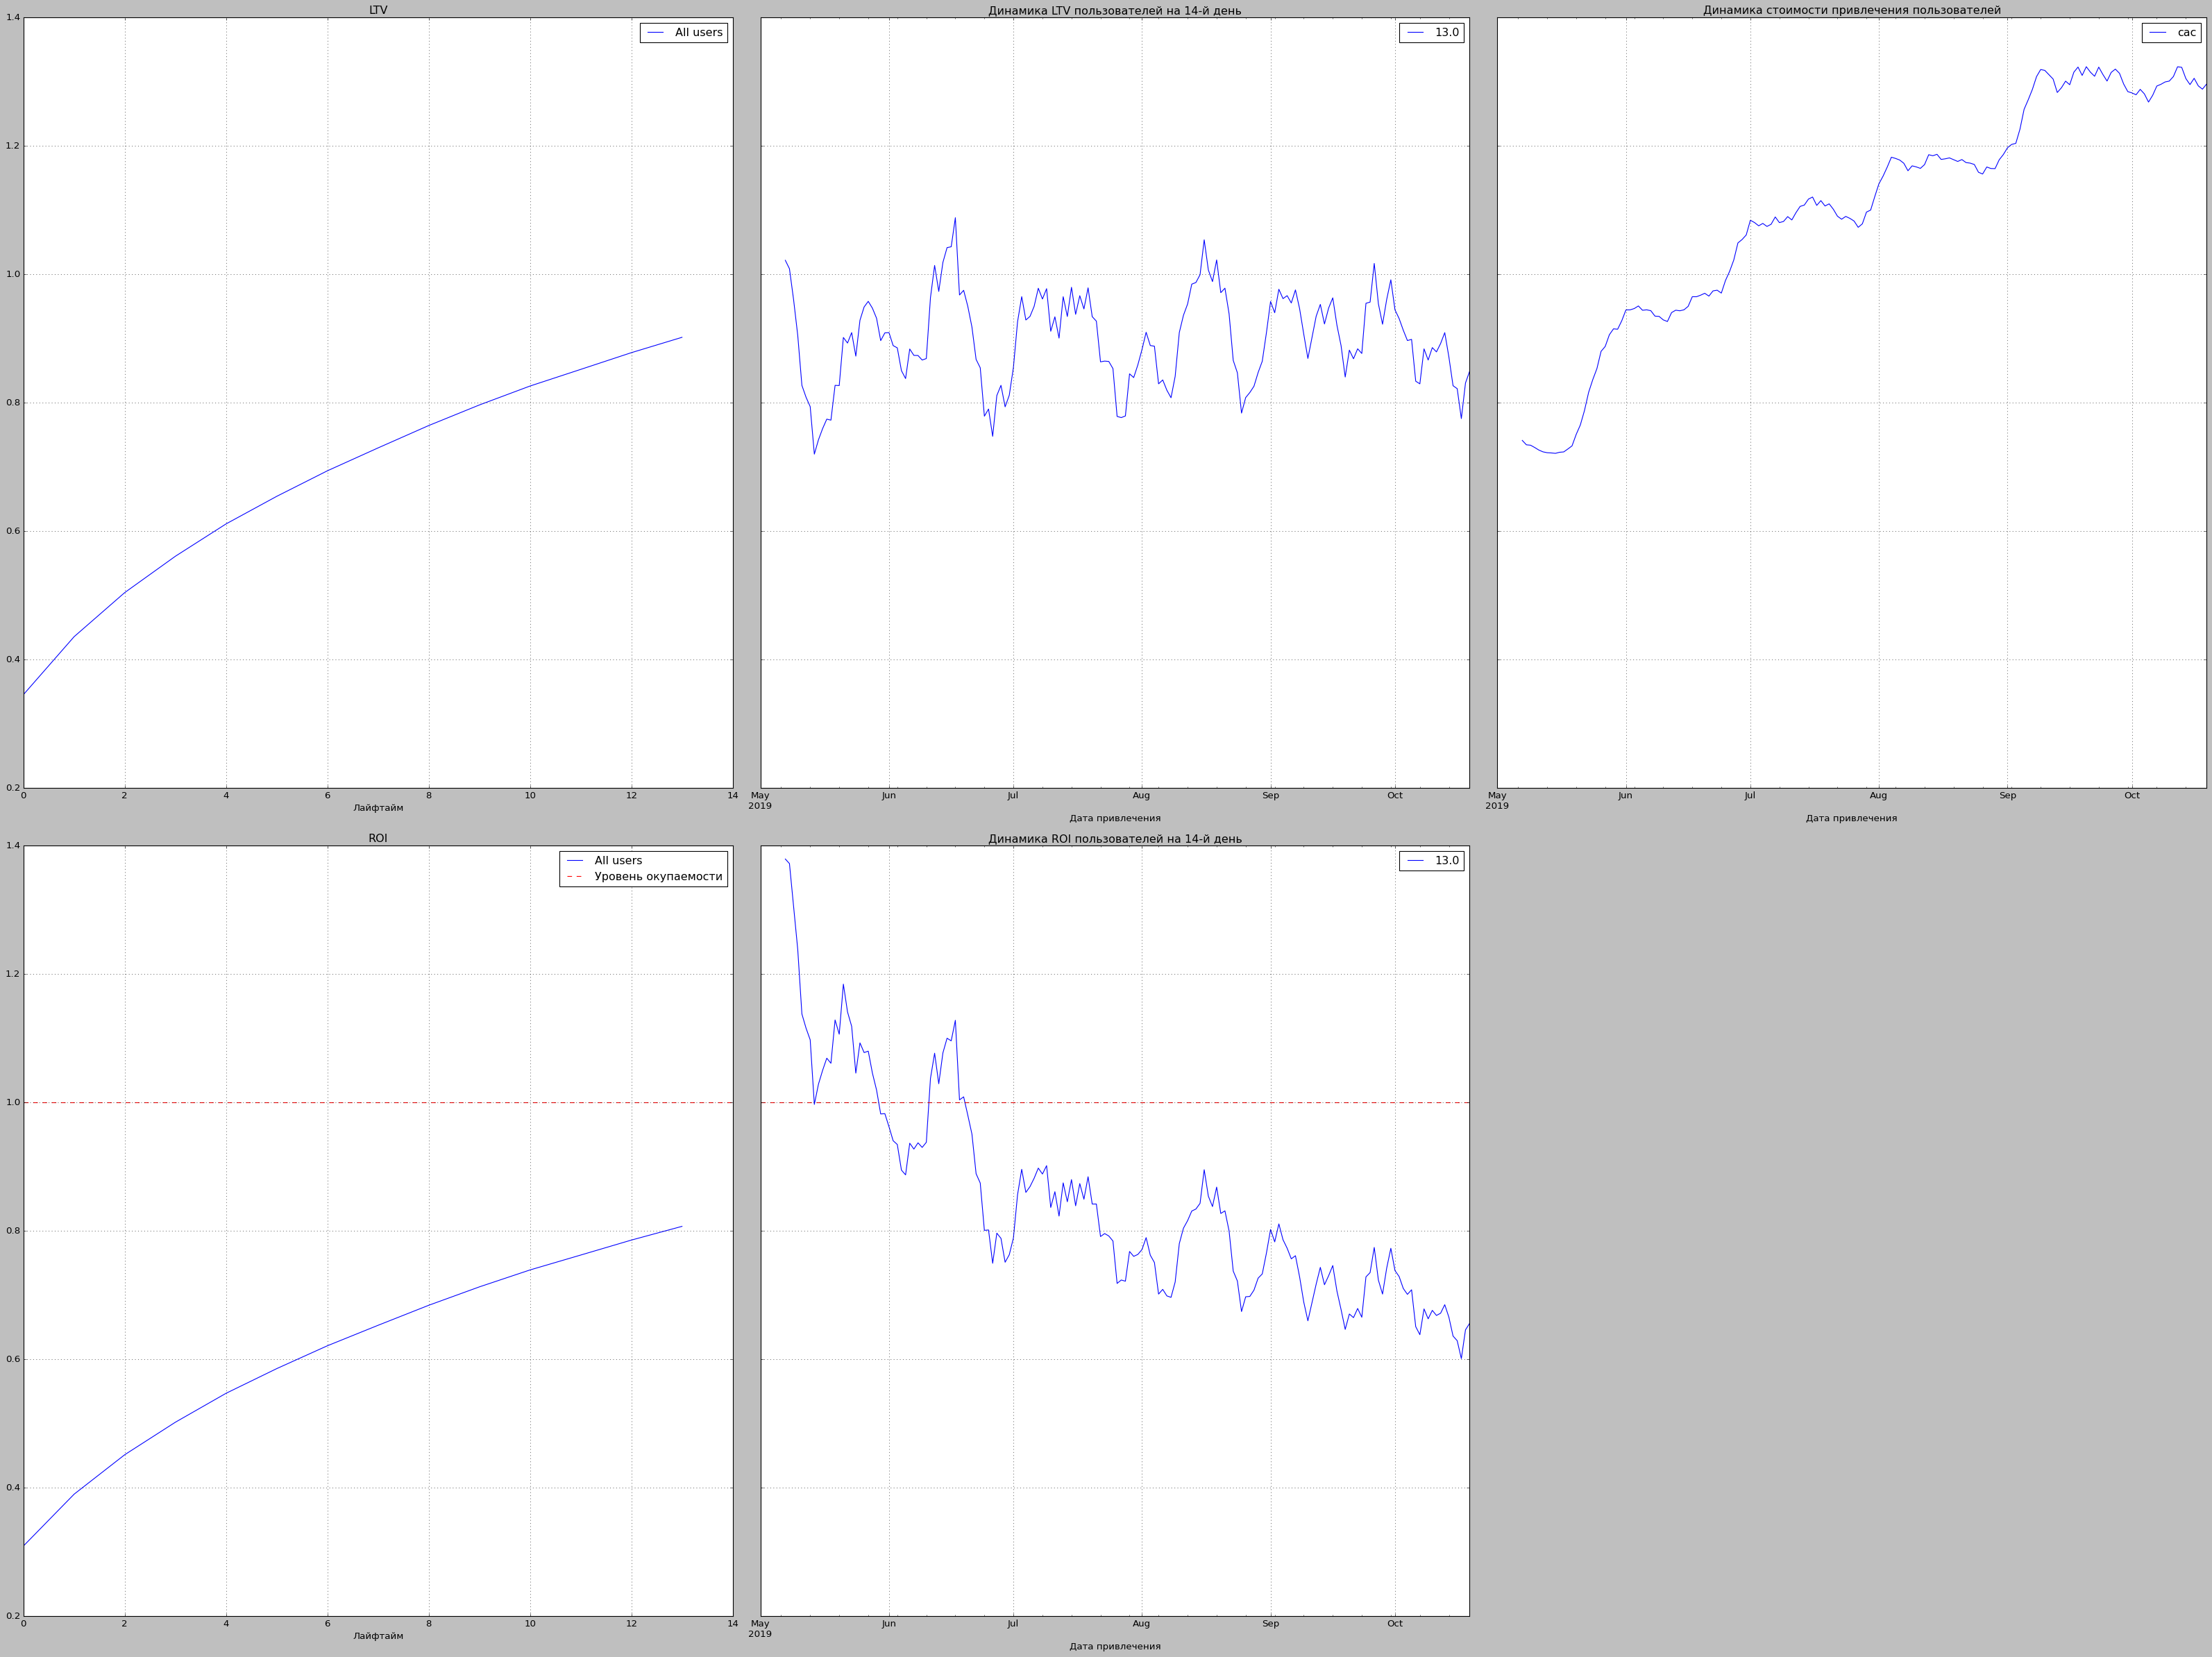

In [123]:
#Задаю функцию визуализации окупаемости рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI по всем пользователям
plot_ltv_roi(ltv_all, ltv_history_all, roi_grouped_all, roi_in_time_all, 14, window=7)

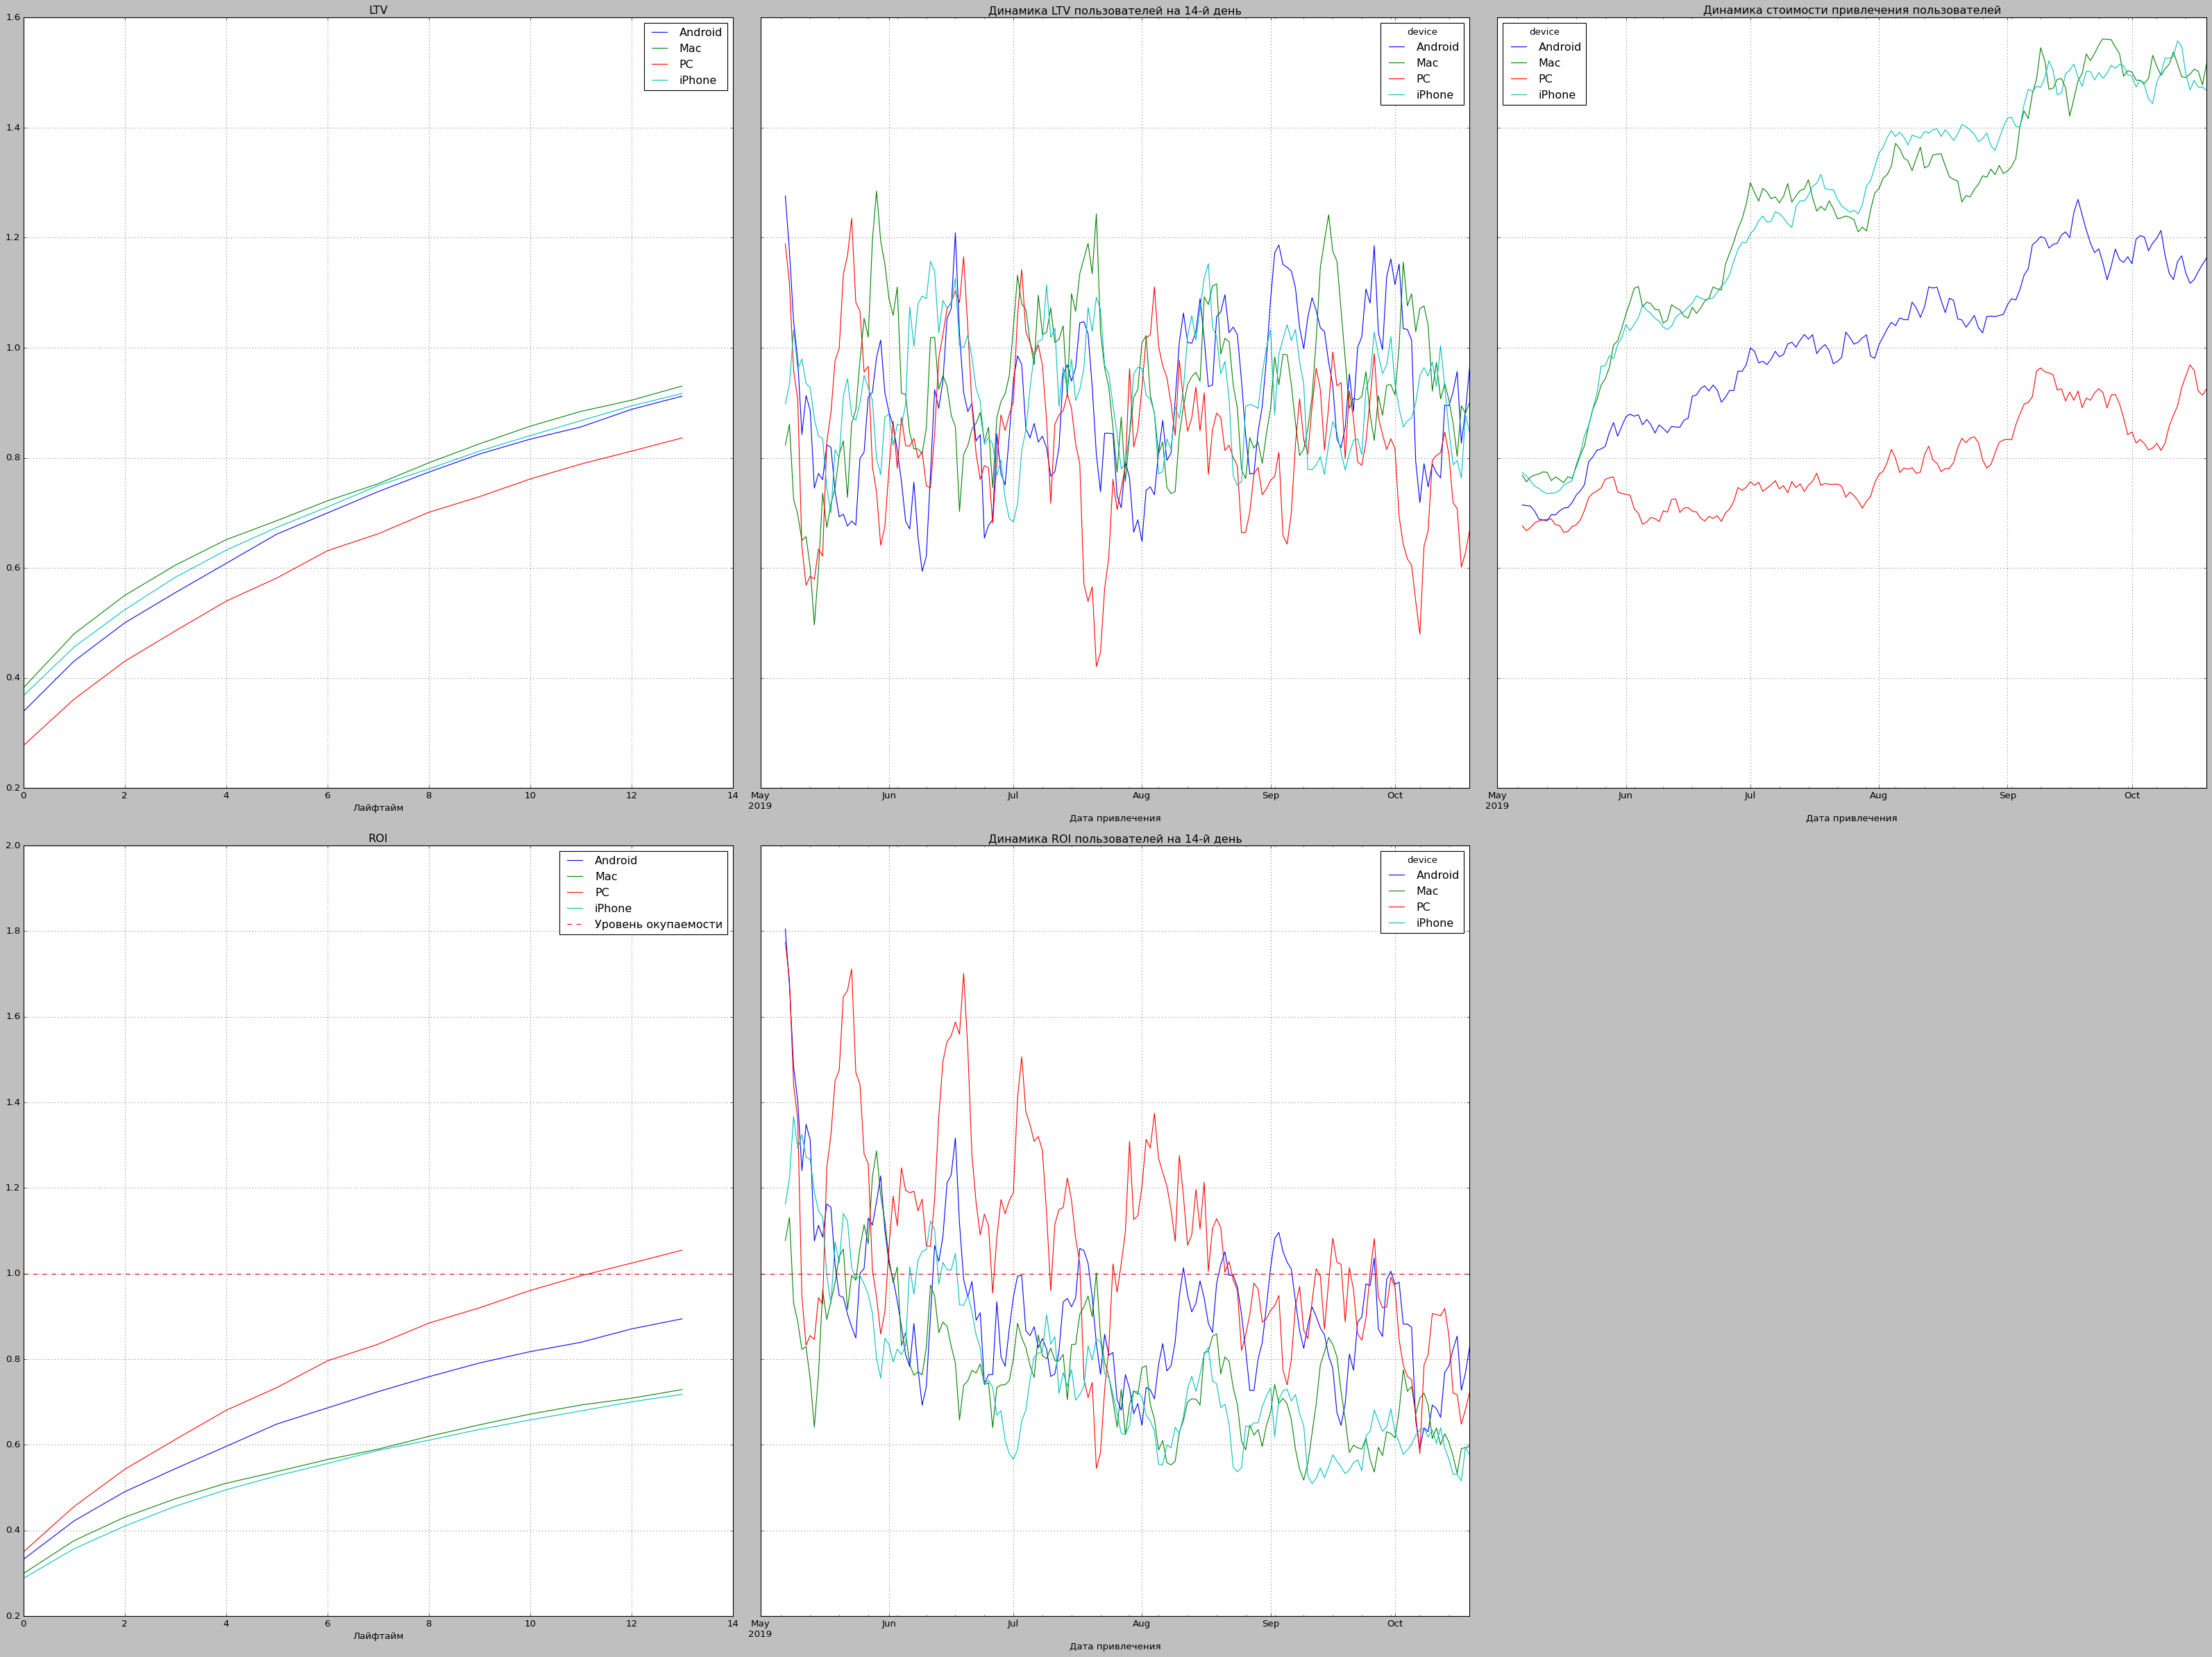

In [124]:
#Задаю функцию визуализации окупаемости рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI по устройствам
plot_ltv_roi(ltv_device, ltv_history_device, roi_grouped_device, roi_in_time_device, 14, window=7)

**Вывод из графиков:** Из Устройств окупаются только PC примерно с 11 дня, на остальных устройствах реклама не окупается. Из динамики стоимости пользователей видно, что на протяжении рассматриваемого интервала достаточно стремительно увеличивается стоимость привлечения клиентов на iPhone и Mac, в то время как стоимость привлечения клиентов на PC увеличивается в меньшей степени и в средней - для пользователей Android.
Самый большое увеличение LTV для пользователей iPhone и Mac, далее идёт Android и самое маленькое - для PC.

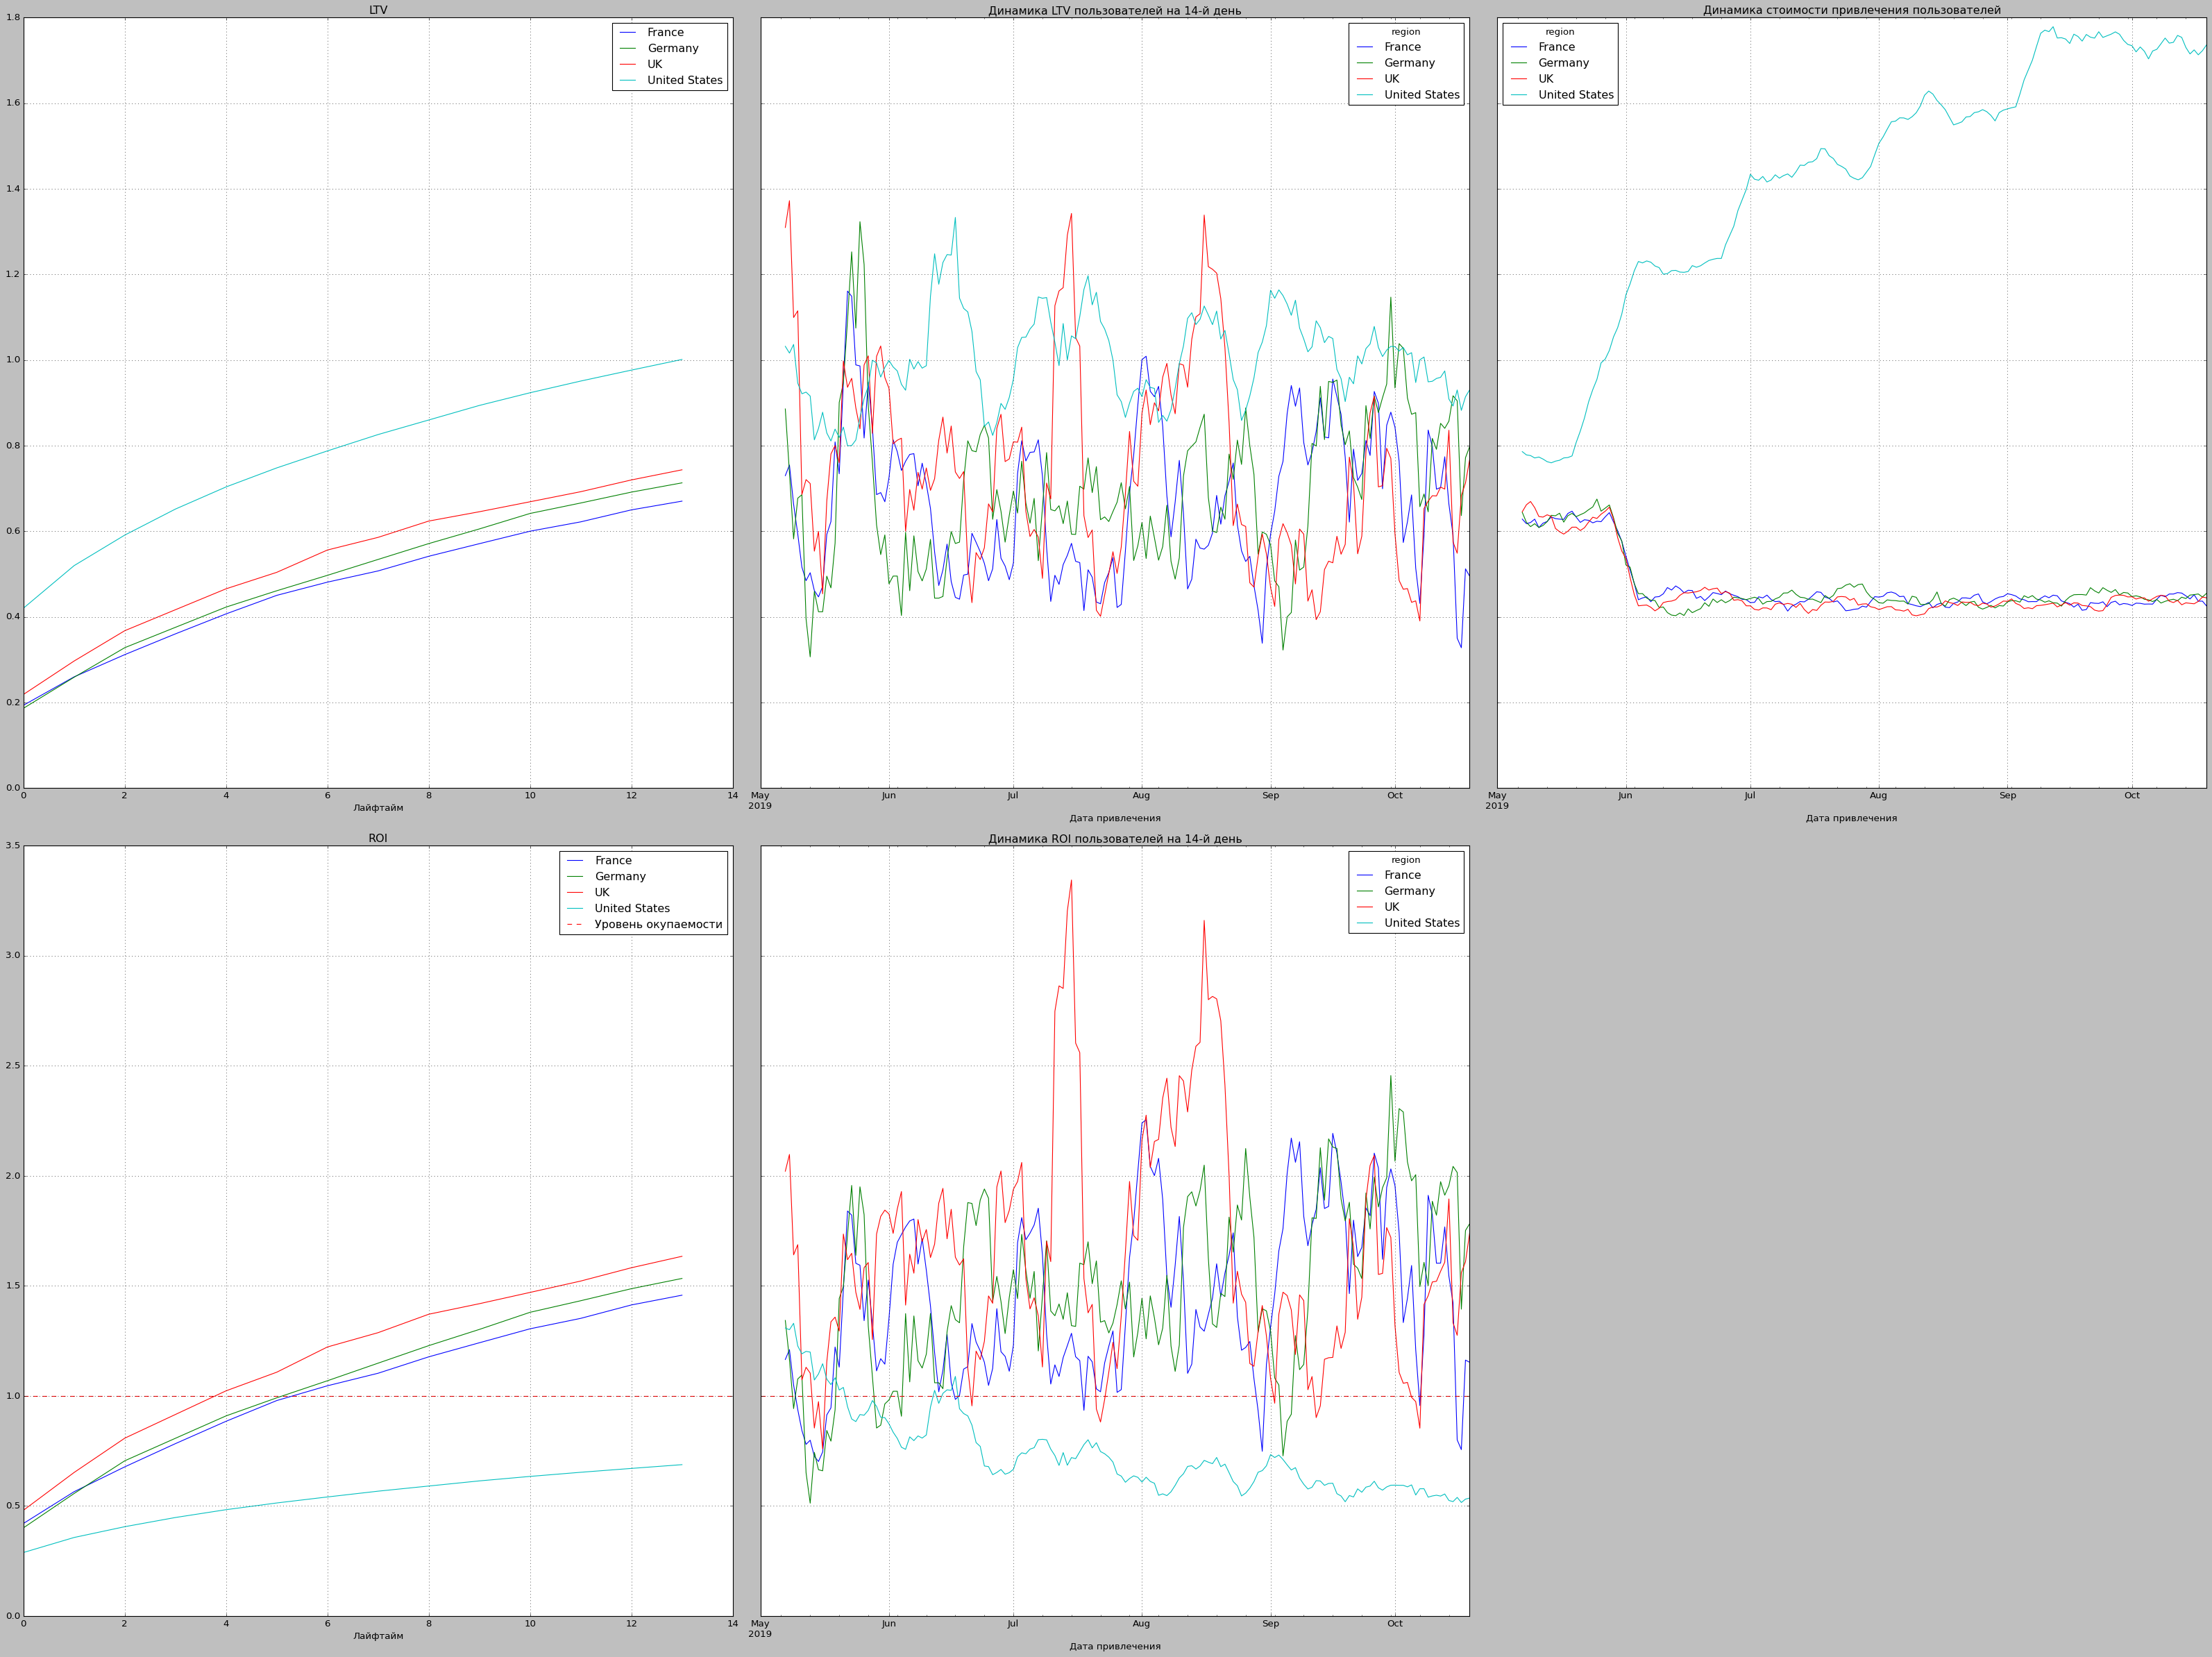

In [125]:
#Задаю функцию визуализации окупаемости рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI по регионам
plot_ltv_roi(ltv_region, ltv_history_region, roi_grouped_region, roi_in_time_region, 14, window=7)

**Вывод из графиков:** Выше всего LTV у США, ниже и примерно на одном уровне у стран - Англии, Германии и Франции. Из РОИ видно, что реклама окупается в Германии, Франции и Англии и не окупается в США. Стоимость привлечения клиентов в США за рассмотренный период резко увеличивается (более чем в 2 раза) в то время как стоимость привлечения клиентов в Англии, Германии и Франции - уменьшается.

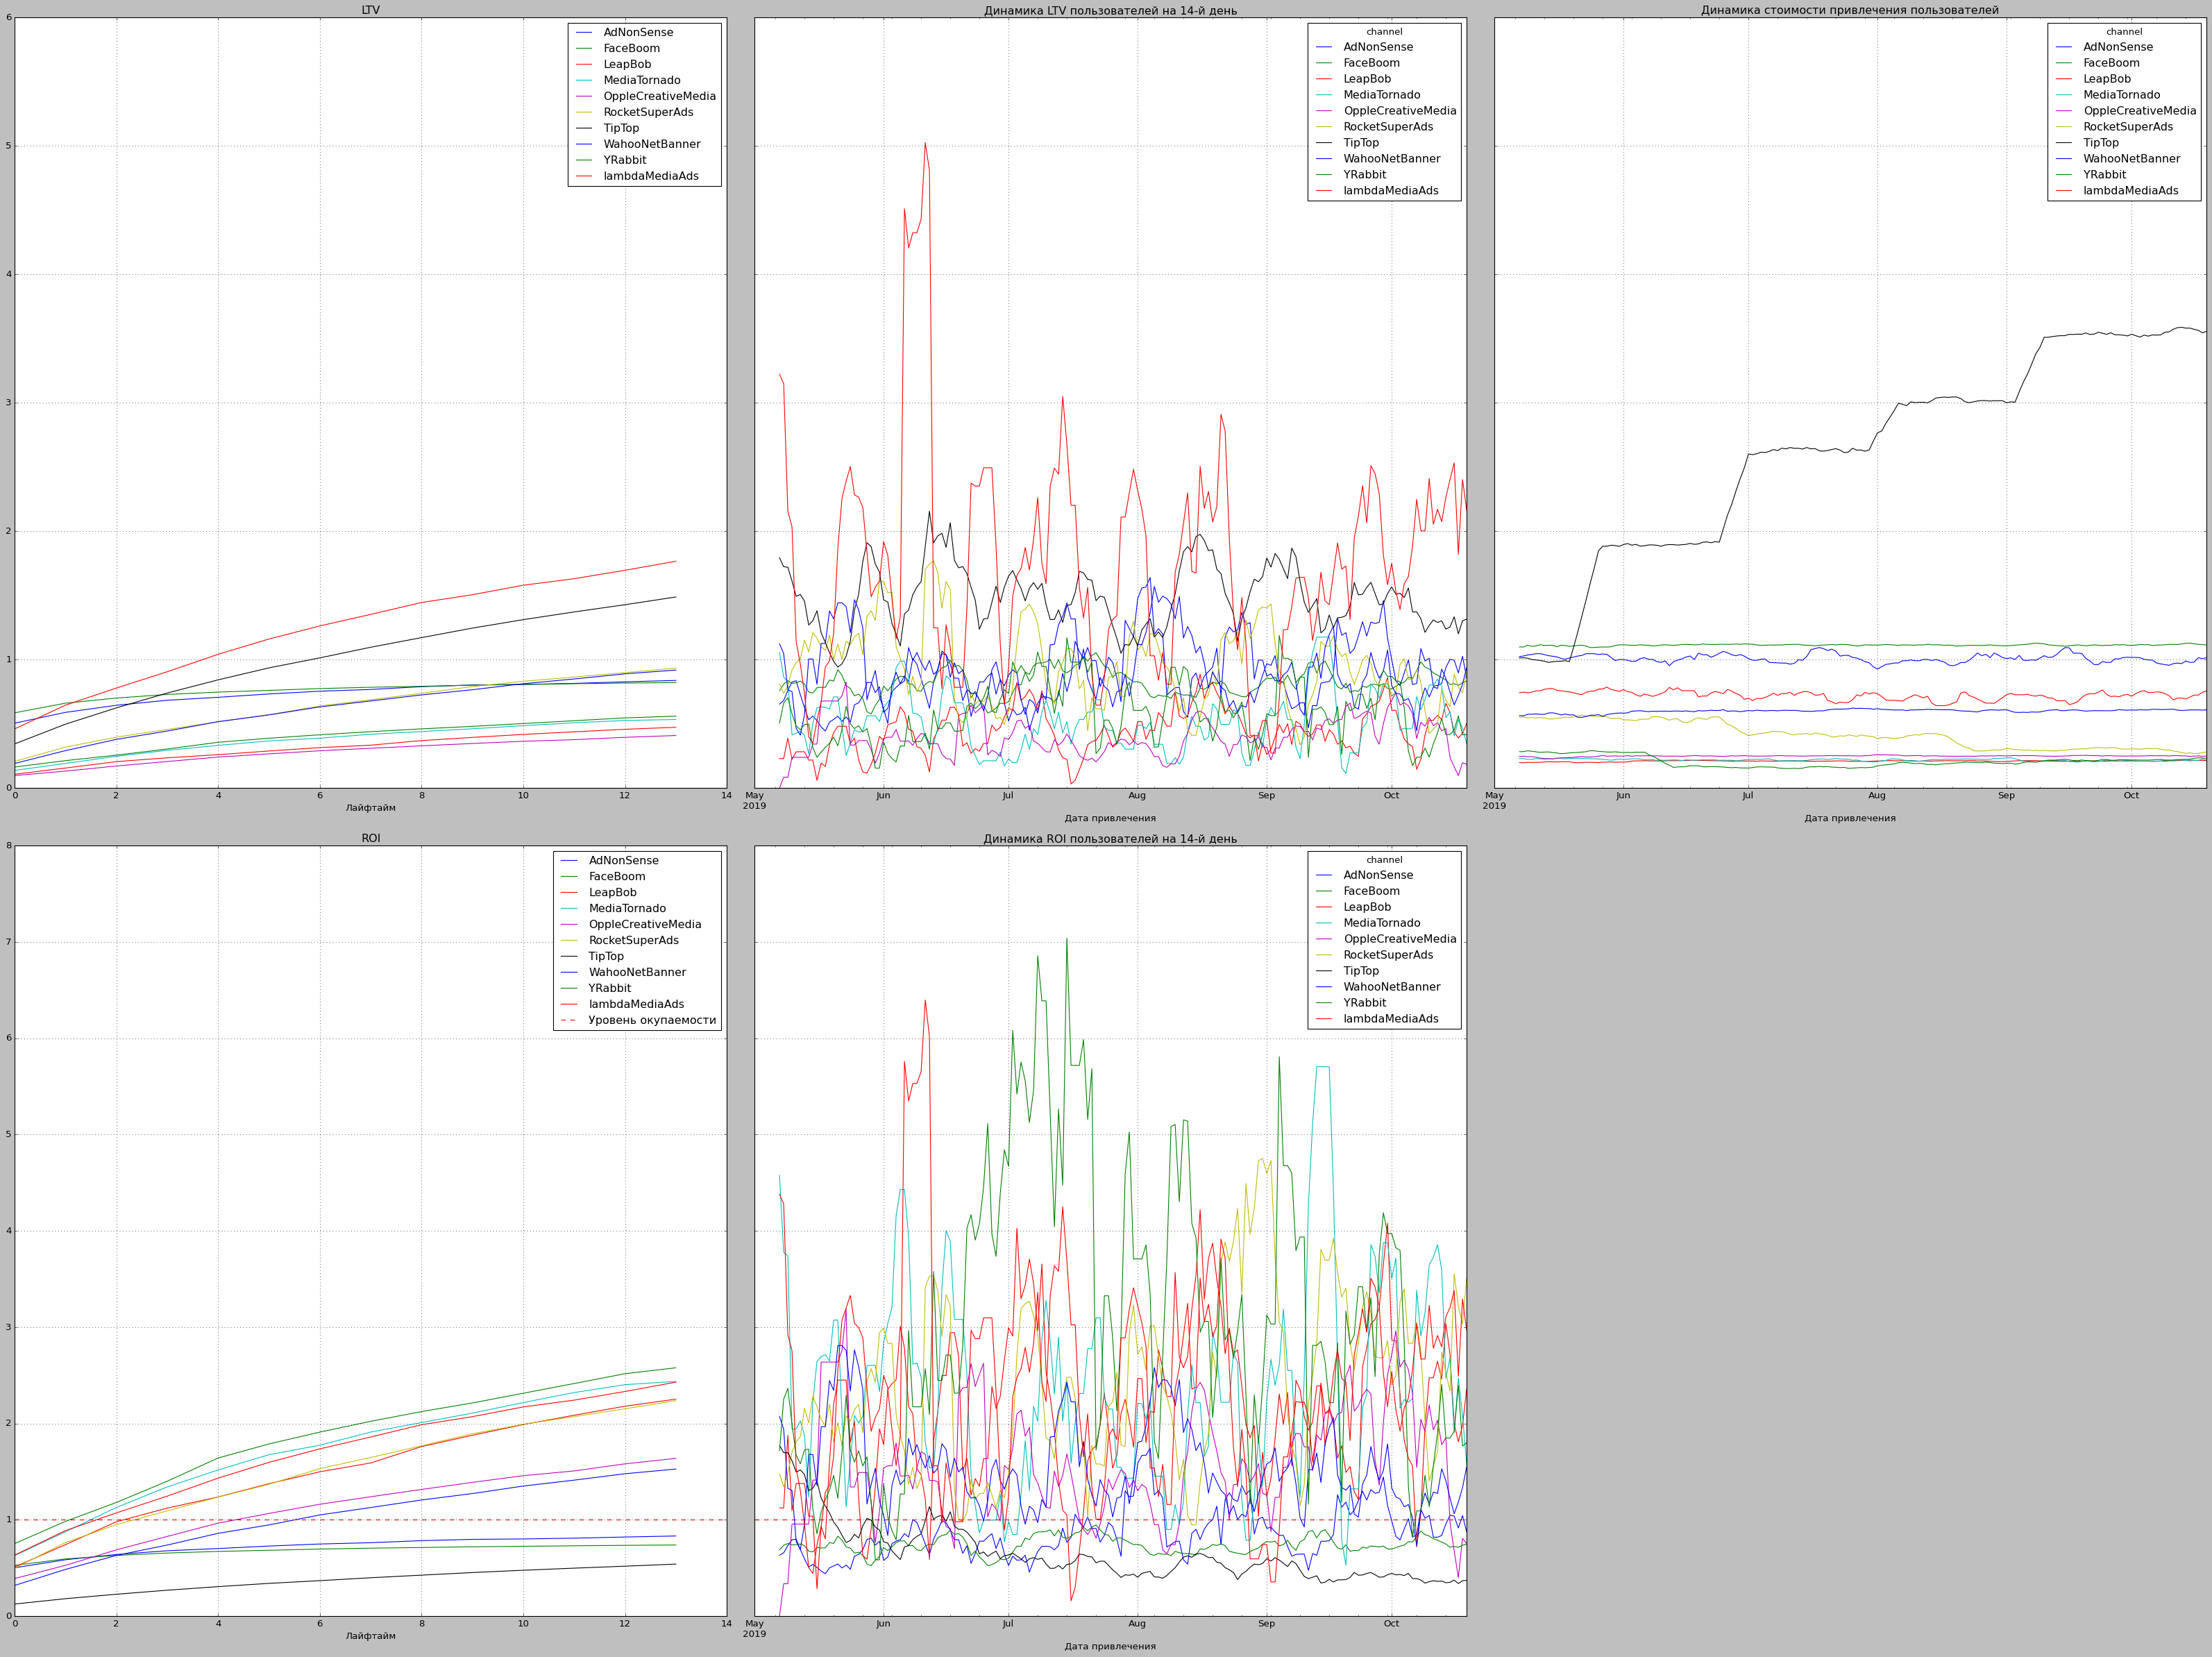

In [126]:
#Задаю функцию визуализации окупаемости рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI по каналам
plot_ltv_roi(ltv_channel, ltv_history_channel, roi_grouped_channel, roi_in_time_channel, 14, window=7)


**Вывод по графикам:** Наибольшие LTV наблюдаются у какналов LeapBob, TipTop, AdNonSense, WahooNetBanner, RocketSuperAds, FaceBoom. Не окупаются каналы TipTop, YRabbit, WahooNetBanner. Из динамики цен на привлечение клиентов выделяется канал TipTop (цены на привлечения клиент ов по этому каналу увеличились более чем в 2 раза). Резкие скачки в динамике LTV с высокими пиками наблюдаются у каналов FaceBoom и LeapBob. 

####**Выводы по  LTV, CAC и ROI**

**Общий вывод:** 

- Реклама не окупается для всех пользователей, окупаемость наблюдалась в мае и июне, а потом - нет, стоимость рекламы постоянно растёт.

- Из Устройств окупаются только PC примерно с 11 дня, на остальных устройствах реклама не окупается. Из динамики стоимости пользователей видно, что на протяжении рассматриваемого интервала достаточно стремительно увеличивается стоимость привлечения клиентов на iPhone и Mac, в то время как стоимость привлечения клиентов на PC увеличивается в меньшей степени и в средней - для пользователей Android. Самый большое увеличение LTV для пользователей iPhone и Mac, далее идёт Android и самое маленькое - для PC.

- Выше всего LTV у США, ниже и примерно на одном уровне у стран - Англии, Германии и Франции. Из РОИ видно, что реклама окупается в Германии, Франции и Англии и не окупается в США. Стоимость привлечения клиентов в США за рассмотренный период резко увеличивается (более чем в 2 раза) в то время как стоимость привлечения клиентов в Англии, Германии и Франции - уменьшается.

- Наибольшие LTV наблюдаются у какналов LeapBob, TipTop, AdNonSense, WahooNetBanner, RocketSuperAds, FaceBoom. Не окупаются каналы TipTop, YRabbit, WahooNetBanner. Из динамики цен на привлечение клиентов выделяется канал TipTop (цены на привлечения клиент ов по этому каналу увеличились более чем в 2 раза). Резкие скачки в динамике LTV с высокими пиками наблюдаются у каналов FaceBoom и LeapBob.


- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

####**Конверсия пользователей и динамика её изменения**

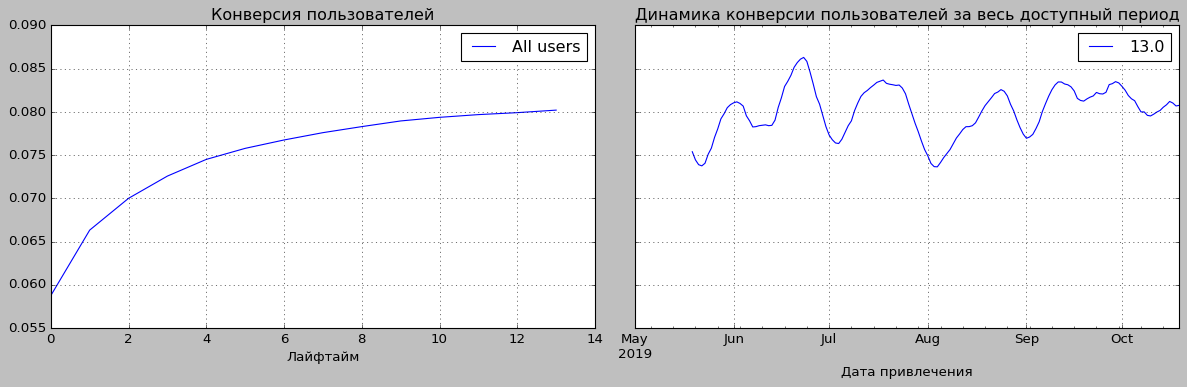

In [127]:
#Вывожу графики конверсии пользователей и динамики по всем пользователям
conversion_raw, conversion, conversion_history = get_conversion2(
     profiles, purchases, datetime(2019, 11, 1).date(), 14, dimensions=[]
)
plot_conversion(conversion, conversion_history, 14)

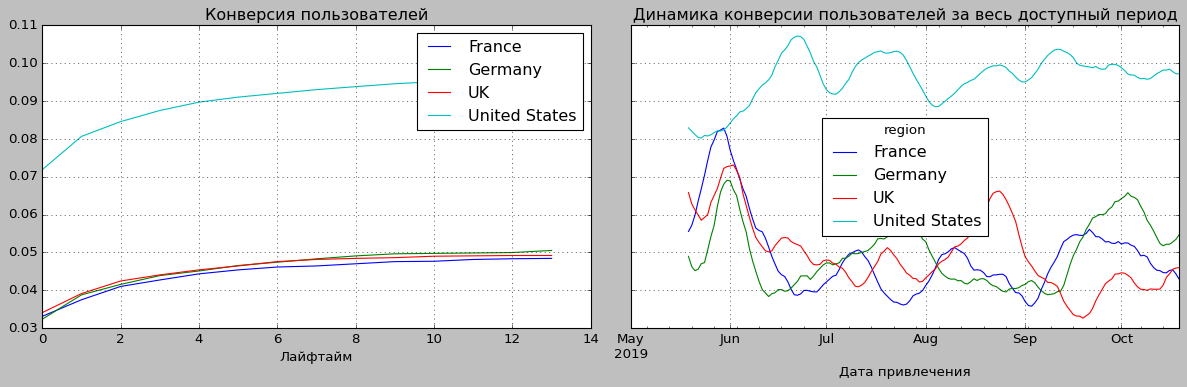

In [128]:
#Вывожу графики конверсии пользователей и динамики по регионам
conversion_raw, conversion_region, conversion_history_region = get_conversion2(
     profiles, purchases, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)
plot_conversion(conversion_region, conversion_history_region, 14)

**Выводы из графиков:** Лучше всего в покупатели конвертируются клиенты из США, хуже из Англии, Германии и Франции, из днамики конверсии виден спад после июня и июля в конверсии для всех стран.

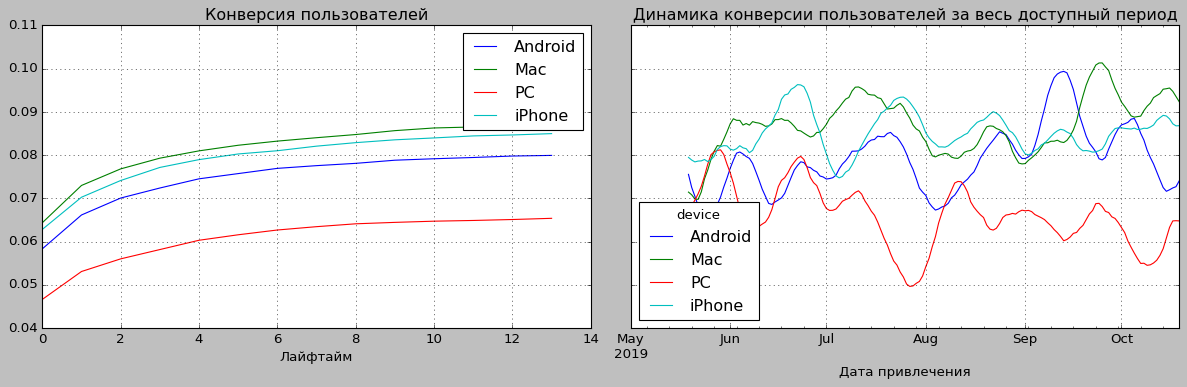

In [129]:
#Вывожу графики конверсии пользователей и динамики по устройствам
conversion_raw, conversion_device, conversion_history_device = get_conversion2(
     profiles, purchases, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)
plot_conversion(conversion_device, conversion_history_device, 14)

**Вывод по графикам:**Лучше всего ковертируются пользователи Mac и iPhone, хуже - пользователи Android и ещё хуже пользователи PC.

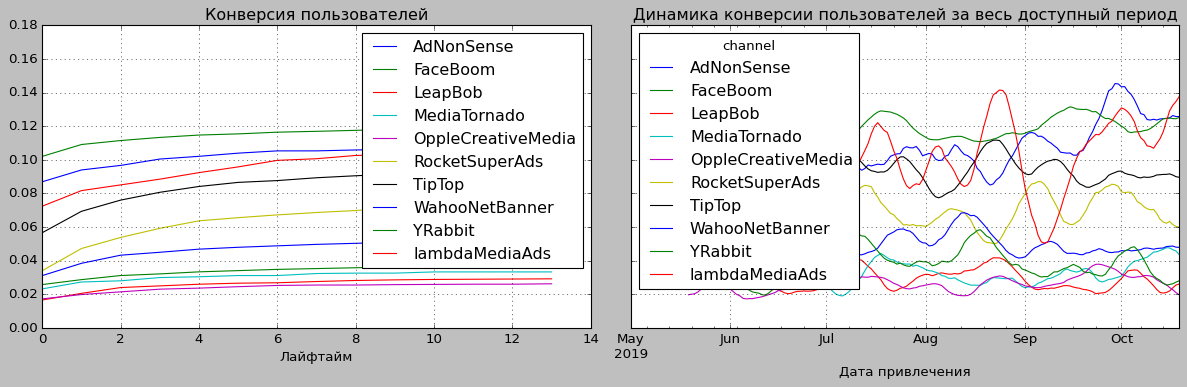

In [130]:
#Вывожу графики конверсии пользователей и динамики по каналам
conversion_raw, conversion_channel, conversion_history_channel = get_conversion2(
     profiles, purchases, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)
plot_conversion(conversion_channel, conversion_history_channel, 14)

**Вывод из грфиков:** Лучше всего конвертируются клиенты с каналов FaceBoom, AdNonSense, LeapBob, а хуже всего YRabbit, lambdaMediaAds, WahooNetBanner. В динамике более стабильно ведёт себя канал FaceBoom, а канал LeapBob имеет резкие взлёты и падения. 

####**Удержание для платящих и не платящих пользователей и динамика удержания 14-го дня**

In [131]:

result_raw, result_grouped, result_in_time = get_retention(profiles, visits,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=[],
    ignore_horizon=False,
)   

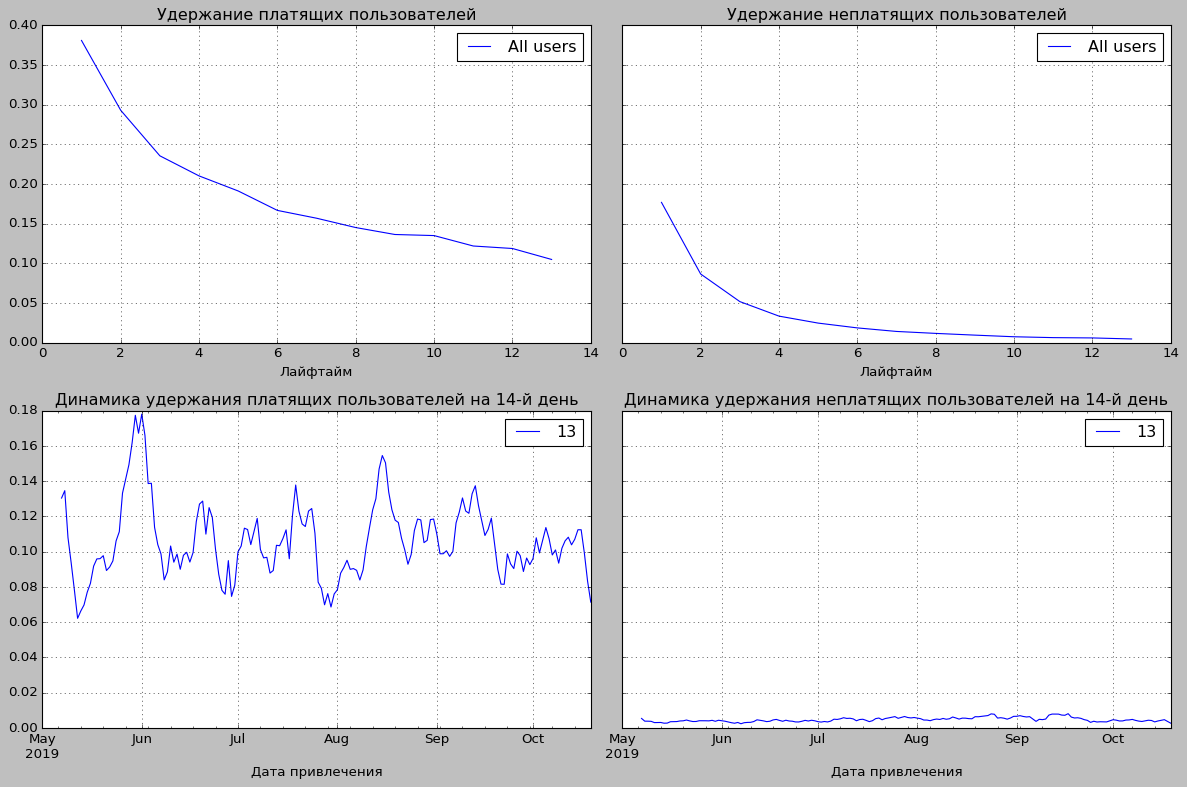

In [132]:
plot_retention(result_grouped, result_in_time, 14, window=7)

In [133]:
result_raw, result_grouped_device, result_in_time_device = get_retention(profiles, visits,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['device'],
    ignore_horizon=False,
)

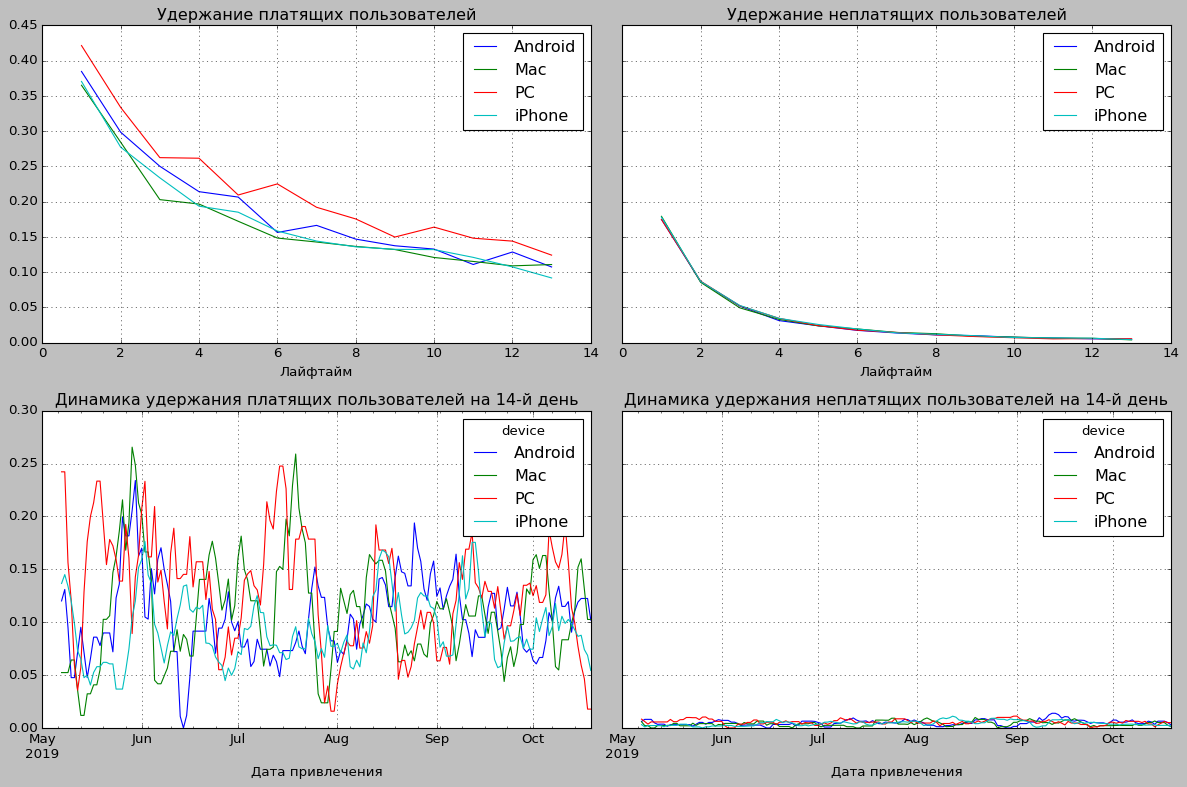

In [134]:
plot_retention(result_grouped_device, result_in_time_device, 14, window=7)

**Вывод по графикам:** Лучше всего платящие пользователи удерживаются те, кто использует PC и Android, однако ни один из девайсов не показывает стабильность удерживания в динамике.

In [135]:
result_raw, result_grouped_region, result_in_time_region = get_retention(profiles, visits,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['region'],
    ignore_horizon=False,
)

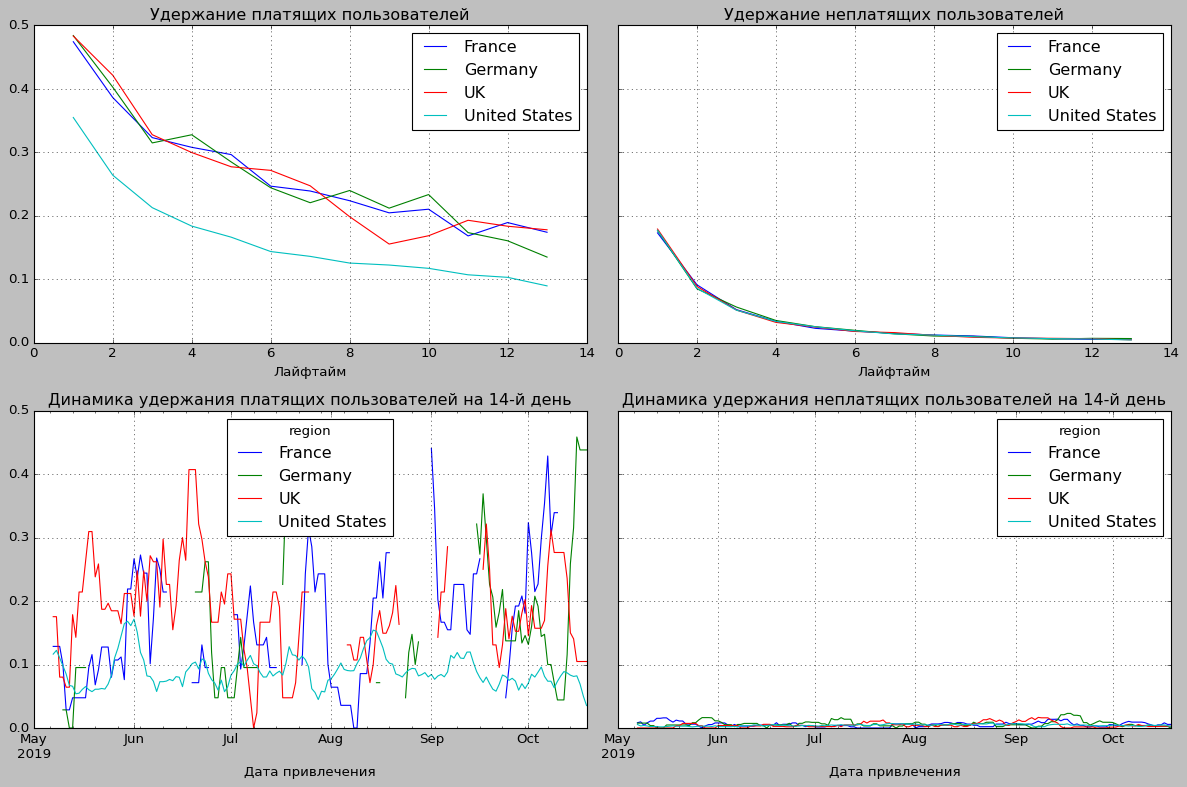

In [136]:
plot_retention(result_grouped_region, result_in_time_region, 14, window=7)

**Вывод из графиков:** Лучше всего удержание у пользователей из Англии, Франции и Германии и хуже удерживаются пользователи из США.

In [137]:
result_raw, result_grouped_channel, result_in_time_channel = get_retention(profiles, visits,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['channel'],
    ignore_horizon=False,
)

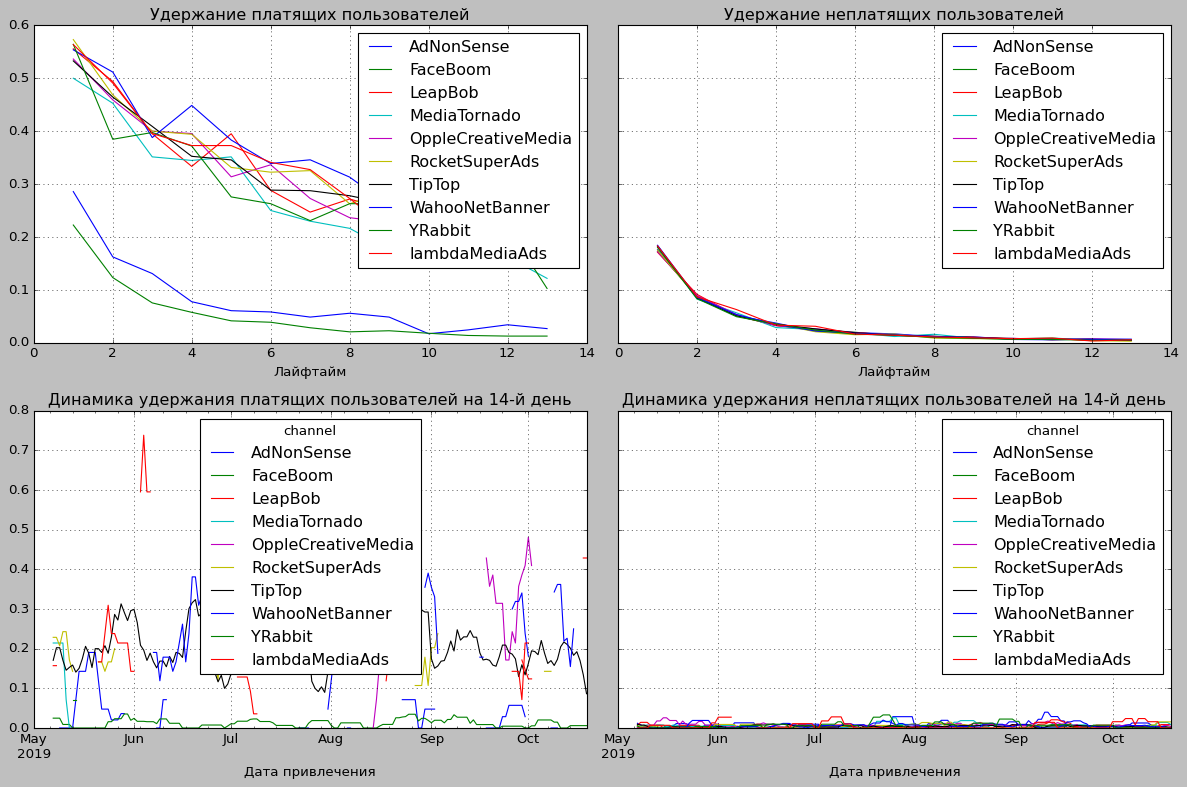

In [138]:
plot_retention(result_grouped_channel, result_in_time_channel, 14, window=7)

**Вывод из графиков:** Хуже всего удерживаются пользователи из каналов YRabbit и WahooNetBanner. 

**Общий вывод:**

Лучше всего в покупатели конвертируются клиенты из США, хуже из Англии, Германии и Франции, из днамики конверсии виден спад после июня и июля в конверсии для всех стран.

Лучше всего ковертируются пользователи Mac и iPhone, хуже - пользователи Android и ещё хуже пользователи PC.

Лучше всего конвертируются клиенты с каналов FaceBoom, AdNonSense, LeapBob, а хуже всего YRabbit, lambdaMediaAds, WahooNetBanner. В динамике более стабильно ведёт себя канал FaceBoom, а канал LeapBob имеет резкие взлёты и падения.

Лучше всего платящие пользователи удерживаются те, кто использует PC и Android, однако ни один из девайсов не показывает стабильность удерживания в динамике.

Лучше всего удержание у пользователей из Англии, Франции и Германии и хуже удерживаются пользователи из США.

Хуже всего удерживаются пользователи из каналов YRabbit и WahooNetBanner.




### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**Причины неэффективности привлечения пользователей**

**Рекомендации для отдела маркетинга**

Большая часть пользователей из оплачиваемой рекламы приходит из США и здесь же самый высокий LTV и большее количество платящих пользователей. И у пользователей из США наибольшая конверсия и наименьшее удержание.

У Германии, Франции и Англии конверсия, удержание и LTV и CAC примерно на одном уровне.

По устройствам , платящие пользователи предпочитают Mac u iPhone, также у них лучше конверсия и теперь уже в меньшей степени,относительно них,персональные компьютеры. У PC хуже всех из устройств конверсия, но лучше всех удержание.


TipTop, YRabbit, AdNonSense не окупаются в среднем по всем странам.По каналу привлечения TipTop, стоимость привлечения пользователей значительно возрасла с мая по ноябрь, при этом не принеся за собой много пользователей бизнесу,и не окупив его.




Причины неэффективности привлечения пользователей- неэффектный маркетинг.

Есть каналы, снижающие окупаемость рекламы. Было бы неплохо дальше продолжить исследование по отдельным странам и девайсам, чтобы выяснить, более подробно какие именно канали в разбивке по странам следует убрать, но это не обязательное задание в исследовании. Точно следует убрать каналы привлеченияя TipTop (возросла стоимость и нет эффекта) и YRabbit (рои ниже нормы, низкая конверсия и удержание клиентов).

Но по устройствам неокупаемости со времнем - iphone,Mac- самые многочисленные каналы у пользователей.

Точки роста:

В США сосредоточиться на пользователях iphone,Mac.

Перераспределить бюджет и оставить малую его часть на каналах TipTop, YRabbit и WahooNetBanner, а сосредоточиться на других имеющихся каналах. Возможно с течением времени динамика поменяется.

Возможно сменить ракурс на эту целевую аудиторию и проверить сезонность рекламы по источникам и скачки цен на рекламму в TipTop.
